# Fundamentals of Machine Learning (Statistics)

## Outline
* Measures of Central Tendency
* Visual Plotting Techniques
* Law of Large Numbers
* Central Limit Theorem
* Covariance and Correlation
* Conditional Probabilities

In [1]:
!pip install scipy #Do not forget to install necesary libraries on yout enviroment

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import scipy
print(scipy.__version__)

1.10.0


### **Principles of Statistics**
* Central Tendency
* Distribucion
* Variability (Dispersion)
* Correlation

1. Central Tendency
Central tendency involves measures like the mean, median, and mode, which represent the "center" of the data. Let’s calculate these for relevant columns like Age and Salary.

In [10]:
# Mean, Median, and Mode for Age and Salary
nbadata = pd.read_csv('nba.csv')
nbadata
central_tendency = {
    'Mean Age': nbadata['Age'].mean(),
    'Median Age': nbadata['Age'].median(),
    'Mode Age': nbadata['Age'].mode()[0],
    'Mean Salary': nbadata['Salary'].mean(),
    'Median Salary': nbadata['Salary'].median(),
    'Mode Salary': nbadata['Salary'].mode()[0]
}

print("Central Tendency Measures:")
print(central_tendency)

Central Tendency Measures:
{'Mean Age': 26.938730853391686, 'Median Age': 26.0, 'Mode Age': 24.0, 'Mean Salary': 4842684.105381166, 'Median Salary': 2839073.0, 'Mode Salary': 947276.0}


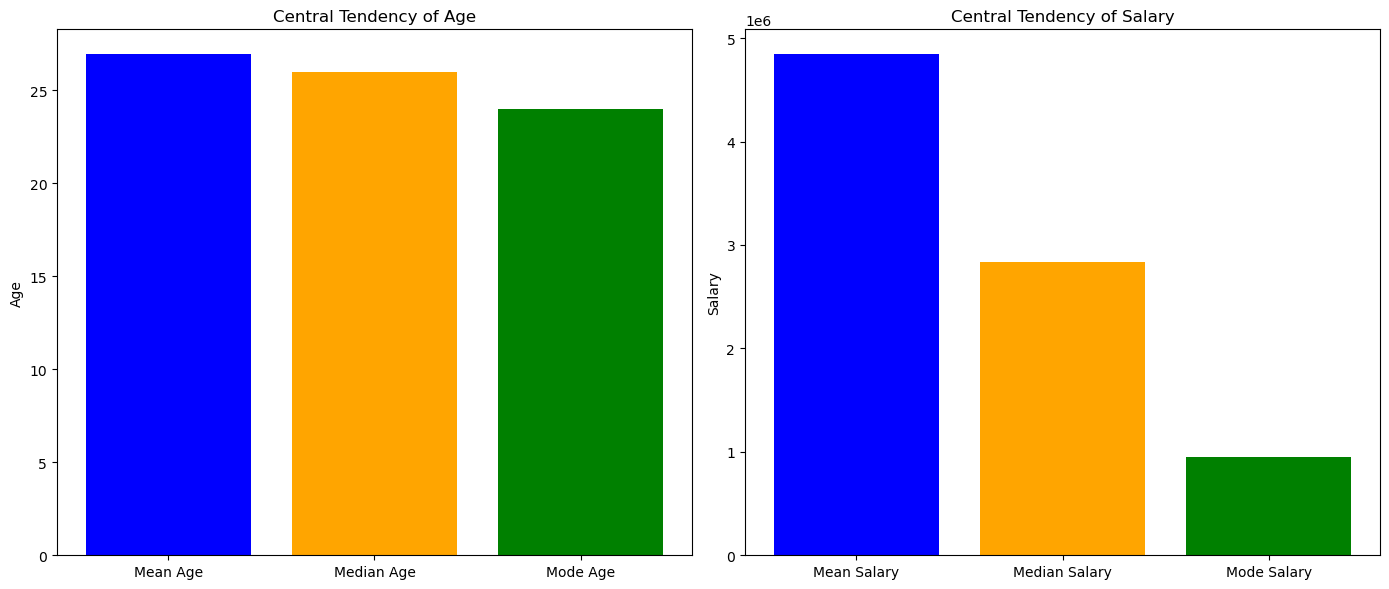

In [16]:
# Plot the central tendency measures
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Age
ax[0].bar(['Mean Age', 'Median Age', 'Mode Age'], #list of labels
          [central_tendency['Mean Age'], central_tendency['Median Age'], central_tendency['Mode Age']], color=['blue', 'orange', 'green']) # list of values and their colors
ax[0].set_title('Central Tendency of Age')
ax[0].set_ylabel('Age')

# Salary
ax[1].bar(['Mean Salary', 'Median Salary', 'Mode Salary'], 
          [central_tendency['Mean Salary'], central_tendency['Median Salary'], central_tendency['Mode Salary']], color=['blue', 'orange', 'green'])
ax[1].set_title('Central Tendency of Salary')
ax[1].set_ylabel('Salary')

plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


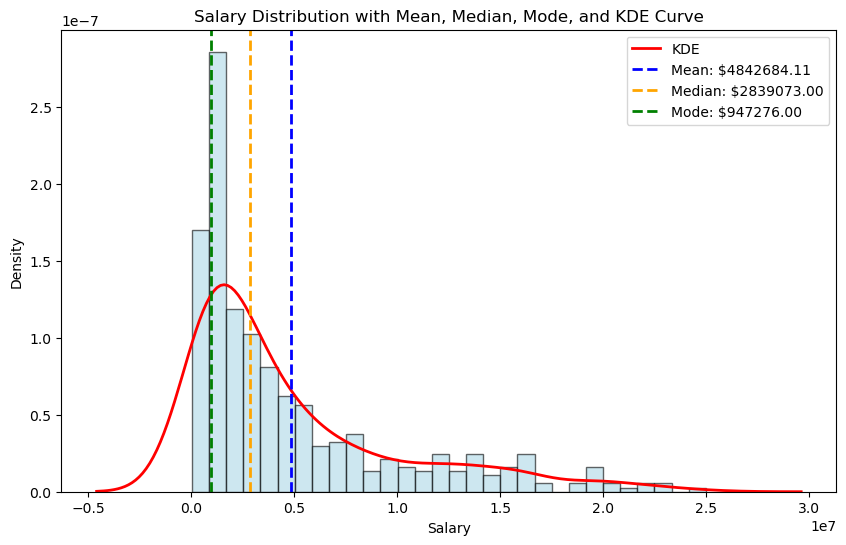

In [49]:
# Plotting a histogram of Salary distribution with mean, median, mode, and KDE curve
#Gaussian distributions, otherwise known as normal distributions or the bell curve
plt.figure(figsize=(10, 6))

# Plot histogram for Salary
plt.hist(nbadata['Salary'].dropna(), bins=30, color='lightblue', edgecolor='black', alpha=0.6, density=True)

# Add KDE (Kernel Density Estimate) curve
sns.kdeplot(nbadata['Salary'].dropna(), color='red', linewidth=2, label='KDE')

# Add lines for mean, median, and mode
plt.axvline(central_tendency['Mean Salary'], color='blue', linestyle='dashed', linewidth=2, label=f"Mean: ${central_tendency['Mean Salary']:.2f}")
plt.axvline(central_tendency['Median Salary'], color='orange', linestyle='dashed', linewidth=2, label=f"Median: ${central_tendency['Median Salary']:.2f}")
plt.axvline(central_tendency['Mode Salary'], color='green', linestyle='dashed', linewidth=2, label=f"Mode: ${central_tendency['Mode Salary']:.2f}")

# Adding labels and title
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Salary Distribution with Mean, Median, Mode, and KDE Curve')
plt.legend()

plt.show()

2. Distribution
The distribution shows how data points are spread across values. For this, you can use a histogram to visualize the distribution of Age and Salary.

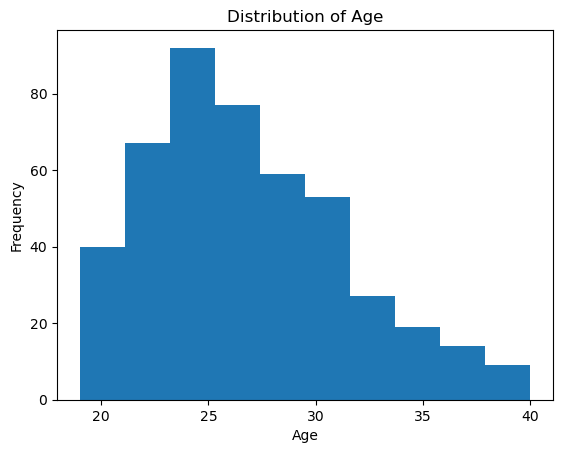

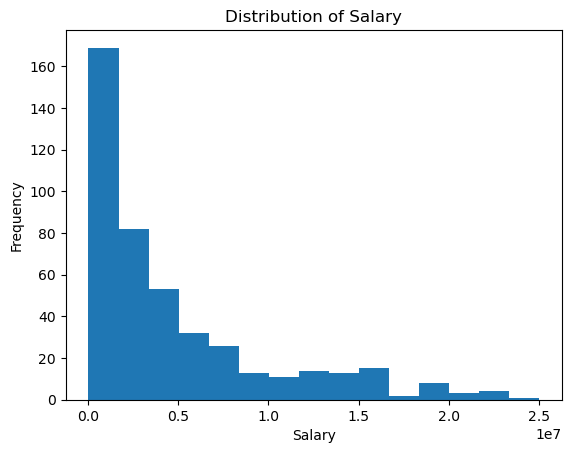

In [11]:
# Histogram for Age
nbadata['Age'].plot(kind='hist', bins=10, title='Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Histogram for Salary
nbadata['Salary'].plot(kind='hist', bins=15, title='Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

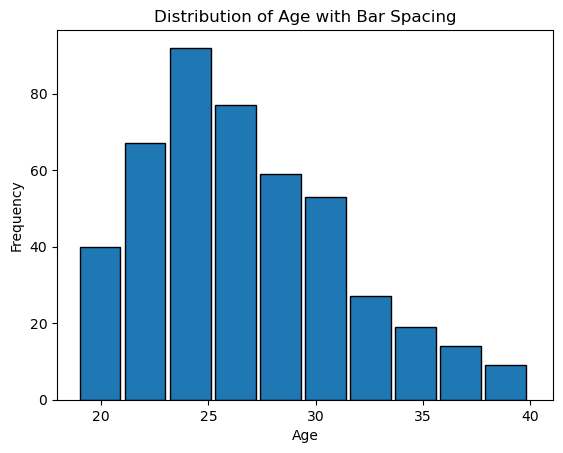

In [12]:
# Plotting histogram with custom bar width and spacing
ax = nbadata['Age'].plot(kind='hist', bins=10, edgecolor='black', width=1.9, title='Distribution of Age with Bar Spacing')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

3. Variability (Dispersion)
Variability or dispersion shows how spread out the data is, using measures like variance and standard deviation.
* Variance: Measures the average squared deviation from the mean.
* Standard Deviation: Square root of variance, indicating the average distance from the mean.

In [13]:
# Variance and Standard Deviation for Age and Salary
variability = {
    'Age Variance': nbadata['Age'].var(),
    'Age Standard Deviation': nbadata['Age'].std(),
    'Salary Variance': nbadata['Salary'].var(),
    'Salary Standard Deviation': nbadata['Salary'].std()
}

print("Variability Measures:")
print(variability)

Variability Measures:
{'Age Variance': 19.395360666436343, 'Age Standard Deviation': 4.4040164244058335, 'Salary Variance': 27344925865857.67, 'Salary Standard Deviation': 5229237.598910349}


4. Correlation
Correlation measures the strength and direction of the relationship between two variables. In this case, you might be interested in the correlation between Age and Salary, or other pairs of numerical variables.

Correlation Matrix:
             Age    Weight    Salary
Age     1.000000  0.087183  0.213459
Weight  0.087183  1.000000  0.138321
Salary  0.213459  0.138321  1.000000


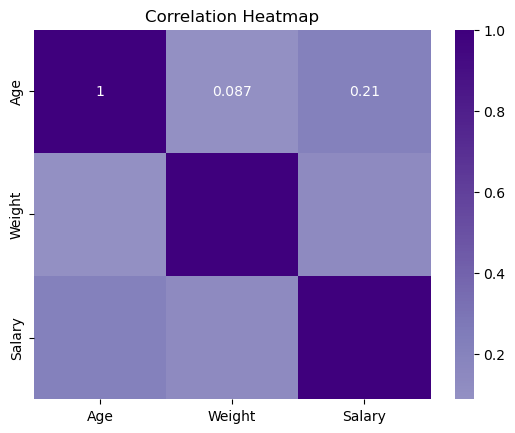

In [15]:
# Correlation between numerical columns
correlation_matrix = nbadata[['Age', 'Weight', 'Salary']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap for visualization (optional, requires seaborn)
import seaborn as sns
import matplotlib.pyplot as plt

plt.title('Correlation Heatmap')
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', center=0)
plt.show()


1.10.0


In [3]:
help(scipy.stats)

Help on package scipy.stats in scipy:

NAME
    scipy.stats - .. _statsrefmanual:

DESCRIPTION
    Statistical functions (:mod:`scipy.stats`)
    
    .. currentmodule:: scipy.stats
    
    This module contains a large number of probability distributions,
    summary and frequency statistics, correlation functions and statistical
    tests, masked statistics, kernel density estimation, quasi-Monte Carlo
    functionality, and more.
    
    Statistics is a very large area, and there are topics that are out of scope
    for SciPy and are covered by other packages. Some of the most important ones
    are:
    
    - `statsmodels <https://www.statsmodels.org/stable/index.html>`__:
      regression, linear models, time series analysis, extensions to topics
      also covered by ``scipy.stats``.
    - `Pandas <https://pandas.pydata.org/>`__: tabular data, time series
      functionality, interfaces to other statistical languages.
    - `PyMC <https://docs.pymc.io/>`__: Bayesian statistical

## Topic 1: Central Tendency
Analyzing central tendencies of data using pandas and numpy.

### Libraries used:
* **numpy**: for numerical operations
* **pandas**: for data manipulation and analysis


## Topic 2: Visualizing Data
Creating histograms, scatter plots, and other plots using matplotlib and seaborn.

### Libraries used:
* **matplotlib**: for general plotting
* **seaborn**: for advanced visualizations

## Topic 3: Law of Large Numbers and Central Limit Theorem
Demonstrating these key concepts in probability using Python.

## Topic 4: Covariance and Correlation
Calculating covariance matrices and correlation using numpy and pandas.

### Codio Activity 2.1: Continuous Uniform Distributions

**Expected Time**: 45 Minutes

**Total Points**: 10

This activity focuses on creating and visualizing continuous probability distributions using `scipy.stats`. You will get practice creating uniform distribution objects, examining their summary statistics (mean, variance, standard deviation), and evaluating and computing probabilities.

#### Index:

- [Problem 1](#Problem-1:-Creating-a-Distribution-Object)
- [Problem 2](#Problem-2:-Descriptive-Statistics-of-Distribution)
- [Problem 3](#Problem-3:-Evaluating-Probabilities)
- [Problem 4](#Problem-4:-Cumulative-Probabilities)

In [19]:
from scipy.stats import uniform
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

[Back to top](#Index:) 

### Problem 1: Creating a Distribution Object

**2 Points**

First, use the above imported `uniform` function to create a uniform distribution object with `loc = 10` and `scale = 3`.  Assign your solution as a distribution object to `dist1` below.

loc: This parameter shifts the distribution along the x-axis. Setting loc=10 moves the starting point of the distribution to 10.

scale: This parameter defines the width of the distribution. For a uniform distribution, the scale represents the range over which the values are spread. Here, scale=3 makes the distribution range from 10 to 10 + 3 = 13.

In [46]:
### GRADED

dist1 = ''

### BEGIN SOLUTION
dist1 = uniform(loc = 10, scale = 3)
### END SOLUTION

# Answer check
print(type(dist1))

<class 'scipy.stats._distn_infrastructure.rv_continuous_frozen'>


[Back to top](#Index:) 

### Problem 2: Descriptive Statistics of Distribution

**2 Points**

Using your distribution object `dist1` from Problem 1, determine the mean, variance, and standard deviation of the distribution using built-in methods.  Assign the results as floats to the variables `dist1_mean`, `dist1_var`, and `dist1_std`, respectively.

In [22]:
### GRADED

dist1_mean = ''
dist1_var = ''
dist1_std = ''

### BEGIN SOLUTION
dist1 = uniform(loc = 10, scale = 3)
dist1_mean = dist1.mean()
dist1_var = dist1.var()
dist1_std = dist1.std()
### END SOLUTION

# Answer check
print([dist1_mean, dist1_var, dist1_std])

[11.5, 0.75, 0.8660254037844386]


Uniform Distribution Metrics:
Mean: 11.5
Variance: 0.75
Standard Deviation: 0.8660254037844386


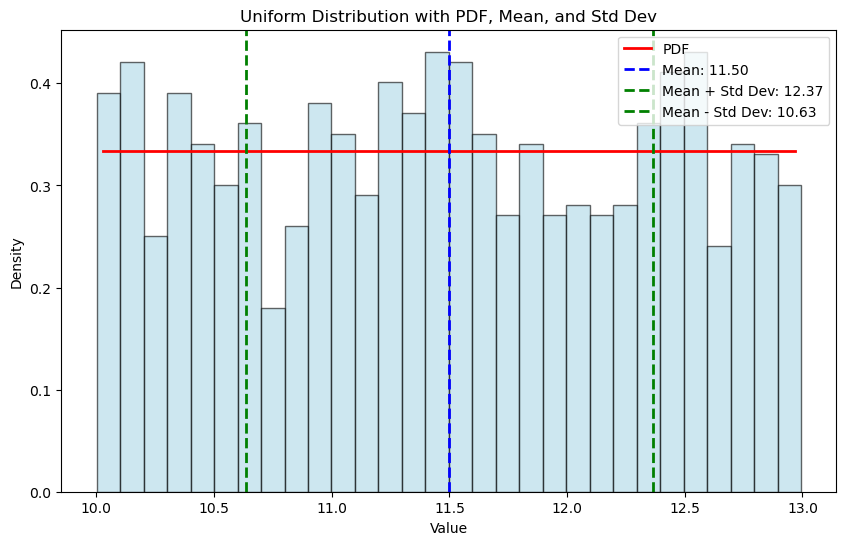

In [47]:
# Define the uniform distribution with loc=10 and scale=3
dist1 = uniform(loc=10, scale=3)

# Calculate mean, variance, and standard deviation
dist1_mean = dist1.mean()
dist1_var = dist1.var()
dist1_std = dist1.std()

# Print the calculated metrics
print("Uniform Distribution Metrics:")
print(f"Mean: {dist1_mean}")
print(f"Variance: {dist1_var}")
print(f"Standard Deviation: {dist1_std}")

# Plotting the histogram of sampled data with the PDF line and metrics
plt.figure(figsize=(10, 6))

# Sample data from the uniform distribution for the histogram
sample_data = dist1.rvs(size=1000)

# Plot histogram
plt.hist(sample_data, bins=30, color='lightblue', edgecolor='black', alpha=0.6, density=True)

# Add PDF line
x = np.linspace(dist1.ppf(0.01), dist1.ppf(0.99), 100)
plt.plot(x, dist1.pdf(x), 'r-', lw=2, label='PDF')

# Add lines for mean and standard deviation
plt.axvline(dist1_mean, color='blue', linestyle='dashed', linewidth=2, label=f"Mean: {dist1_mean:.2f}")
plt.axvline(dist1_mean + dist1_std, color='green', linestyle='dashed', linewidth=2, label=f"Mean + Std Dev: {dist1_mean + dist1_std:.2f}")
plt.axvline(dist1_mean - dist1_std, color='green', linestyle='dashed', linewidth=2, label=f"Mean - Std Dev: {dist1_mean - dist1_std:.2f}")

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Uniform Distribution with PDF, Mean, and Std Dev')
plt.legend()

plt.show()

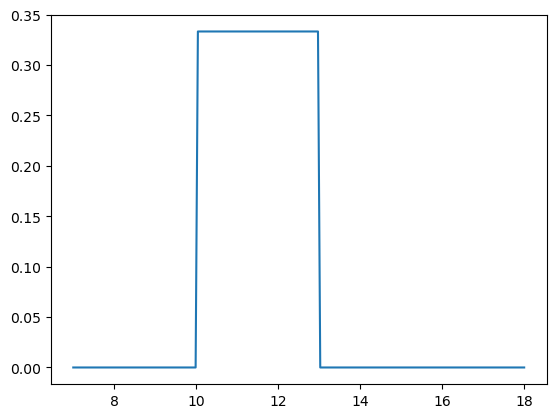

In [56]:
# Generate points for the PDF plot
upoints = np.linspace(7, 18, 200)  # Wider range for visual clarity, as in your example
ppoints = dist1.pdf(upoints)

# Plot the PDF
plt.plot(upoints,ppoints)

Uniform Distribution Metrics:
Mean: 11.5
Variance: 0.75
Standard Deviation: 0.8660254037844386


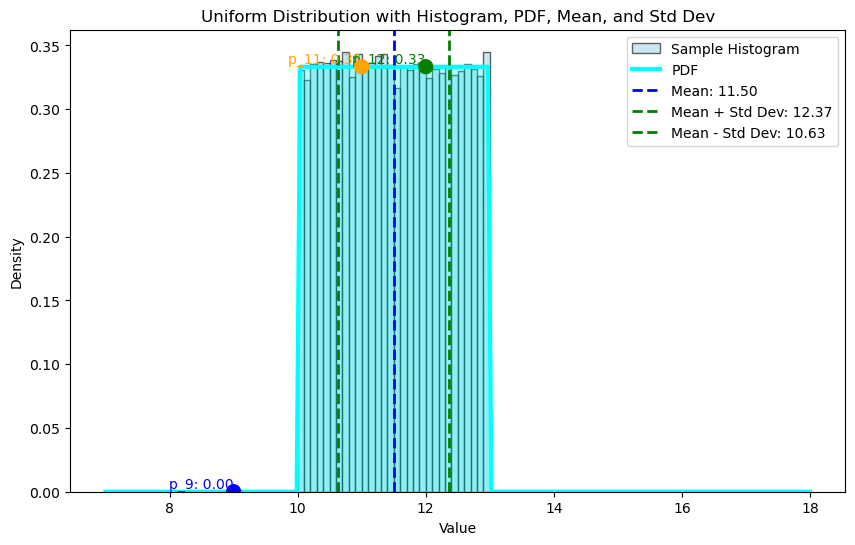

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Define the uniform distribution with loc=10 and scale=3
dist1 = uniform(loc=10, scale=3)

# Calculate mean, variance, and standard deviation
dist1_mean = dist1.mean()
dist1_var = dist1.var()
dist1_std = dist1.std()

# Print the calculated metrics
print("Uniform Distribution Metrics:")
print(f"Mean: {dist1_mean}")
print(f"Variance: {dist1_var}")
print(f"Standard Deviation: {dist1_std}")

# Sample data from the uniform distribution for the histogram
sample_data = dist1.rvs(size=100000)  # random variates

# Generate points for the PDF line
upoints = np.linspace(7, 18, 200)
ppoints = dist1.pdf(upoints)

# Plot histogram of the sample data
plt.figure(figsize=(10, 6))
plt.hist(sample_data, bins=30, color='lightblue', edgecolor='black', alpha=0.6, density=True, label="Sample Histogram")

# Plot the PDF line
plt.plot(upoints, ppoints, color='cyan', linewidth=3, label='PDF')
plt.fill_between(upoints, ppoints, color='cyan', alpha=0.3)  # Fill under PDF for visual emphasis

# Add lines for mean and standard deviation
plt.axvline(dist1_mean, color='blue', linestyle='dashed', linewidth=2, label=f"Mean: {dist1_mean:.2f}")
plt.axvline(dist1_mean + dist1_std, color='green', linestyle='dashed', linewidth=2, label=f"Mean + Std Dev: {dist1_mean + dist1_std:.2f}")
plt.axvline(dist1_mean - dist1_std, color='green', linestyle='dashed', linewidth=2, label=f"Mean - Std Dev: {dist1_mean - dist1_std:.2f}")

# Highlight specific points on the PDF
p_9 = dist1.pdf(9)
p_11 = dist1.pdf(11)
p_12 = dist1.pdf(12)
plt.scatter([9, 11, 12], [p_9, p_11, p_12], color=['blue', 'orange', 'green'], s=100, zorder=5)
plt.text(9, p_9, f'p_9: {p_9:.2f}', color='blue', ha='right', va='bottom')
plt.text(11, p_11, f'p_11: {p_11:.2f}', color='orange', ha='right', va='bottom')
plt.text(12, p_12, f'p_12: {p_12:.2f}', color='green', ha='right', va='bottom')

# Adding labels, title, and legend
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Uniform Distribution with Histogram, PDF, Mean, and Std Dev')
plt.legend()

plt.show()


[Back to top](#Index:) 

### Plotting the Distribution                                                              


For completeness, the plot of the distribution `dist1` is given below:


![](images/dist1.png)









[Back to top](#Index:) 

### Problem 3: Evaluating Probabilities 

**2 Points**

Next, you want to evaluate the probability of a specific outcome.  

Determine the probabilities below using the `.pdf` method on `dist1`: 

- Compute $P(9)$ and assign the result to `p_9` as a float.
- Compute $P(11)$ and assign the result to `p_11` as a float.
- Compute $P(11~ \text{or} ~12)$ and assign the result to `p_11_or_12` as a float. For this step, sum the probability of $P(11)$ and $P(12)$.

In [24]:
### GRADED

p_9 = ''
p_11 = ''
p_11_or_12 = ''

### BEGIN SOLUTION
p_9 = dist1.pdf(9)
p_11 = dist1.pdf(11)
p_11_or_12 = dist1.pdf(11) + dist1.pdf(12)
### END SOLUTION

# Answer check
print(p_9, p_11, p_11_or_12)

0.0 0.3333333333333333 0.6666666666666666


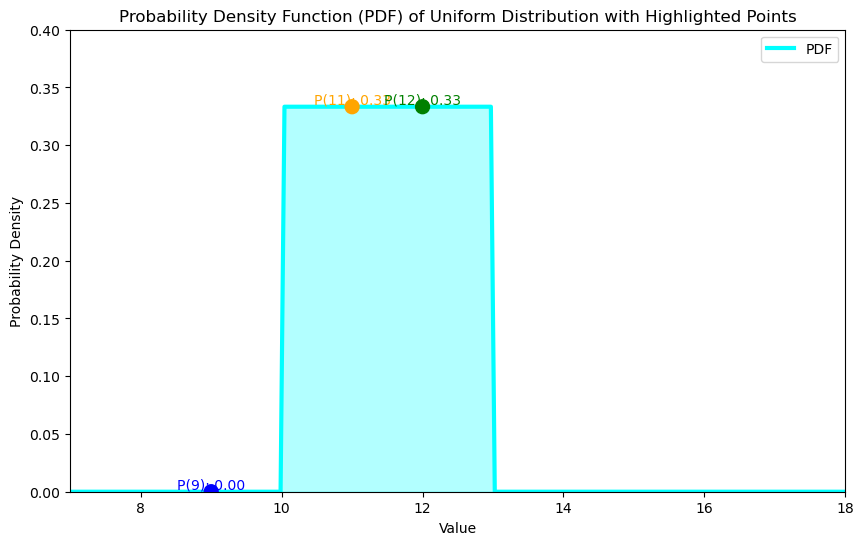

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Define the uniform distribution with loc=10 and scale=3
dist1 = uniform(loc=10, scale=3)

# Calculate PDF values for specific points
p_9 = dist1.pdf(9)    # PDF at x = 9 (should be 0 because 9 is outside the range)
p_11 = dist1.pdf(11)  # PDF at x = 11 (within the range)
p_12 = dist1.pdf(12)  # PDF at x = 12 (within the range)
p_11_or_12 = p_11 + p_12  # Sum of PDF at 11 and 12

# Generate points for the PDF curve
upoints = np.linspace(7, 18, 200)
ppoints = dist1.pdf(upoints)

# Plot the PDF curve
plt.figure(figsize=(10, 6))
plt.plot(upoints, ppoints, color='cyan', linewidth=3, label='PDF')
plt.fill_between(upoints, ppoints, color='cyan', alpha=0.3)  # Fill under PDF

# Highlight specific points
plt.scatter([9, 11, 12], [p_9, p_11, p_12], color=['blue', 'orange', 'green'], s=100, zorder=5)
plt.text(9, p_9, f'P(9): {p_9:.2f}', color='blue', ha='center', va='bottom')
plt.text(11, p_11, f'P(11): {p_11:.2f}', color='orange', ha='center', va='bottom')
plt.text(12, p_12, f'P(12): {p_12:.2f}', color='green', ha='center', va='bottom')

# Adding labels, title, and legend
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Probability Density Function (PDF) of Uniform Distribution with Highlighted Points')
plt.legend()

plt.xlim(7, 18)
plt.ylim(0, 0.4)

plt.show()


[Back to top](#Index:) 

### Problem 4: Cumulative Probabilities

**2 Points**

The `.cdf` method can be used to determine cumulative probabilities.  

Use the `.cdf` method on `dist1` to determine the following cumulative probabilities:


- Compute $P(x < 12)$ and assign the result to `p_less_than_12` as a float.
- Compute $P(11 < x < 13)$ and assign the result to `p_between_11_and_13` as a float.
- Compute  $P(x > 12)$ and assign the result to `p_greater_than_12` as a float.



In [8]:
### GRADED

p_less_than_12 = ''
p_between_11_and_13 = ''
p_greater_than_12 = ''

### BEGIN SOLUTION
p_less_than_12 = dist1.cdf(12)
p_between_11_and_13 = dist1.cdf(13) - dist1.cdf(11)
p_greater_than_12 = 1 - dist1.cdf(12)
### END SOLUTION

# Answer check
print(p_less_than_12, p_between_11_and_13, p_greater_than_12)

0.6666666666666666 0.6666666666666667 0.33333333333333337


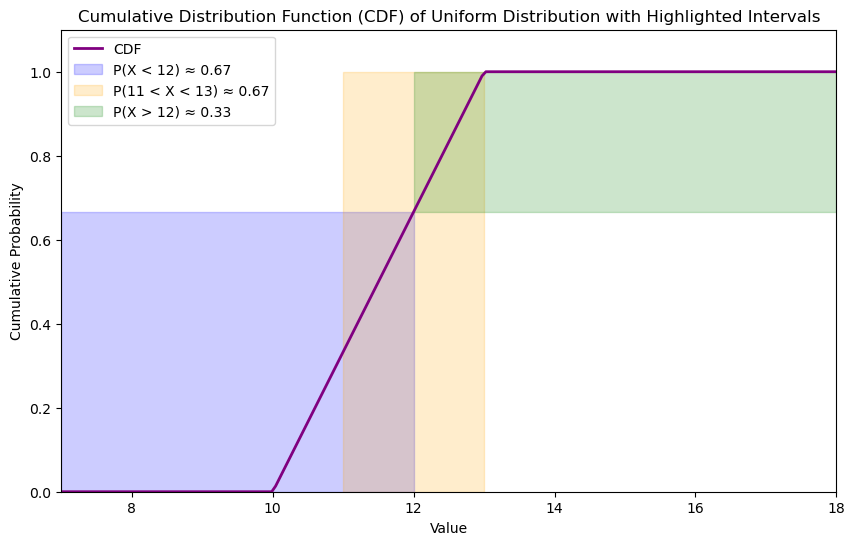

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Define the uniform distribution with loc=10 and scale=3
dist1 = uniform(loc=10, scale=3)

# Calculate cumulative probabilities
p_less_than_12 = dist1.cdf(12)
p_between_11_and_13 = dist1.cdf(13) - dist1.cdf(11)
p_greater_than_12 = 1 - dist1.cdf(12)

# Generate points for the CDF curve
upoints = np.linspace(7, 18, 200)
cdf_points = dist1.cdf(upoints)

plt.figure(figsize=(10, 6))

# Plot the CDF curve for the uniform distribution
plt.plot(upoints, cdf_points, color='purple', linewidth=2, label='CDF')

# Highlight specific areas based on the calculated probabilities
plt.fill_betweenx([0, p_less_than_12], 7, 12, color='blue', alpha=0.2, label=f'P(X < 12) ≈ {p_less_than_12:.2f}')
plt.fill_betweenx([0, 1], 11, 13, color='orange', alpha=0.2, label=f'P(11 < X < 13) ≈ {p_between_11_and_13:.2f}')
plt.fill_betweenx([p_less_than_12, 1], 12, 18, color='green', alpha=0.2, label=f'P(X > 12) ≈ {p_greater_than_12:.2f}')

# Adding labels, title, and legend
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) of Uniform Distribution with Highlighted Intervals')
plt.legend()

plt.xlim(7, 18)
plt.ylim(0, 1.1)

plt.show()


### Codio Activity 2.2: Gaussian Distributions

**Expected Time**: 45 Minutes

**Total Points**: 10

This activity focuses on generating and examining Gaussian distributions using `scipy.stats`.  The main idea is to use the distribution to generate a sample and compare the sample statistics to those known in your distribution.   Note that you are to use the `.rvs` method of the distribution object rather than any NumPy methods directly for generating samples.  

#### Index:

- [Problem 1](#Problem-1:-Creating-Gaussian-Distribution-Object)
- [Problem 2](#Problem-2:-Random-Samples-from-Distribution)
- [Problem 3](#Problem-3:-Statistics-of-Sample)



In [17]:
from scipy.stats import uniform
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

[Back to top](#Index:) 

### Problem 1: Creating a Gaussian Distribution Object

**2 Points**

Above, the Gaussian distribution function has been imported using the `norm` function from the `scipy.stats` library.

Use this function to create a Guassian distribution centered at 5 with standard deviation equal to 2.  Assign your solution as a distribution object to `gauss1` below.
    

    

In [27]:
### GRADED
# Create a gausssian distribution from sample set

gauss1 = None

### BEGIN SOLUTION
gauss1 = norm(loc = 5, scale = 2)
### END SOLUTION

# ANSWER CHECK
print(type(gauss1))

<class 'scipy.stats._distn_infrastructure.rv_continuous_frozen'>


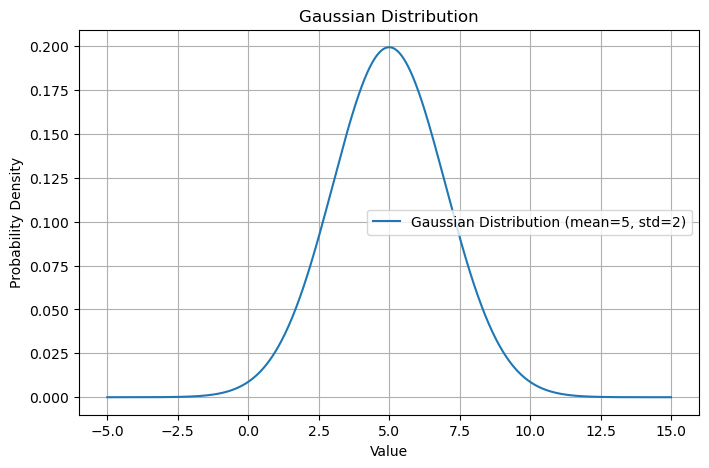

In [63]:
# Re-import necessary libraries and re-run the plotting code since the environment was reset.

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the Gaussian distribution with mean (loc) = 5 and standard deviation (scale) = 2
gauss1 = norm(loc=5, scale=2)

# Generate a sample range for plotting
x_values = np.linspace(-5, 15, 1000)
y_values = gauss1.pdf(x_values)

# Plot the Gaussian distribution
plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label='Gaussian Distribution (mean=5, std=2)')
plt.title('Gaussian Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

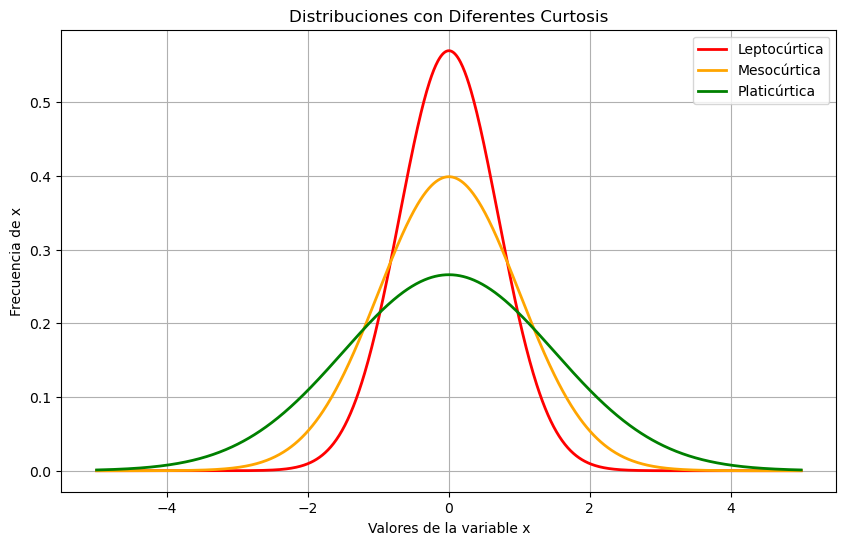

In [66]:
#Kurtosis

# Set up x values
x = np.linspace(-5, 5, 1000)

# Gaussian distributions with different standard deviations to represent each type of kurtosis
mesokurtic = norm.pdf(x, loc=0, scale=1)  # Normal (Mesokurtic)
leptokurtic = norm.pdf(x, loc=0, scale=0.7)  # Sharper peak (Leptokurtic)
platykurtic = norm.pdf(x, loc=0, scale=1.5)  # Flatter shape (Platykurtic)

# Plot all distributions on the same chart
plt.figure(figsize=(10, 6))
plt.plot(x, leptokurtic, label='Leptocúrtica', color='red', linewidth=2)
plt.plot(x, mesokurtic, label='Mesocúrtica', color='orange', linewidth=2)
plt.plot(x, platykurtic, label='Platicúrtica', color='green', linewidth=2)

# Set up title, labels, and legend in Spanish to match the uploaded image style
plt.title('Distribuciones con Diferentes Curtosis')
plt.xlabel('Valores de la variable x')
plt.ylabel('Frecuencia de x')
plt.legend()
plt.grid(True)
plt.show()


[Back to top](#Index:) 

### Problem 2: Random Samples from Distribution

**3 Points**

Use the `.rvs` method on `gauss1` to generate 100 random samples from the distribution.  Inside the `.rvs` method, set`random_state` equal to 12. Assign your response as an array to the variable `samples` below.

In [82]:
### GRADED

samples = ''

### BEGIN SOLUTION
samples = gauss1.rvs(100, random_state = 12)
### END SOLUTION

# ANSWER CHECK
print(type(samples))
print(len(samples))

<class 'numpy.ndarray'>
100


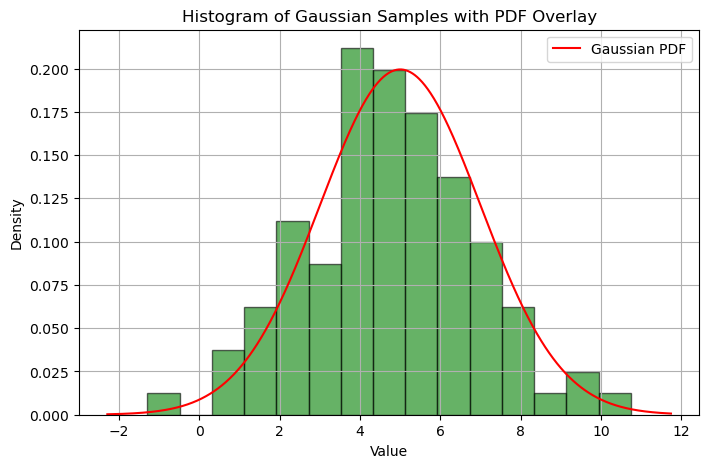

<class 'numpy.ndarray'>
100


In [86]:
# Define the Gaussian distribution with mean=5 and std=2 as per the previous context.
gauss1 = norm(loc=5, scale=2)

# Generate 100 random samples from the Gaussian distribution
#How to Choose a Random State
#You can set the random state to any integer value (e.g., 12, 42, 0). 
#The specific number doesn’t matter—it just locks the randomness to produce consistent results 
#for that particular seed.

samples = gauss1.rvs(100, random_state=12)

# Plot a histogram of the samples
plt.figure(figsize=(8, 5))
plt.hist(samples, bins=15, density=True, alpha=0.6, color='green', edgecolor='black')

# Overlay the Gaussian distribution curve for reference
x = np.linspace(min(samples)-1, max(samples)+1, 1000)
plt.plot(x, gauss1.pdf(x), 'r-', label='Gaussian PDF')

# Add labels and title
plt.title('Histogram of Gaussian Samples with PDF Overlay')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Print the type and length of samples for answer check
print(type(samples))
print(len(samples))


[Back to top](#Index:) 

### Problem 3: Statistics of Sample

**2 Points**

Use `np.mean` and `np.std` on the variable `samples` you defined in Problem 2 to determine the mean and standard deviation of the sample values.

Assign the result to the variables `sample_mean` and `sample_std`, respectively. 

In [31]:
### GRADED

sample_mean = ''
sample_std = ''

### BEGIN SOLUTION
sample_mean = np.mean(samples)
sample_std = np.std(samples)
### END SOLUTION

# ANSWER CHECK
print(sample_mean)
print(type(sample_mean))

4.711385004722623
<class 'numpy.float64'>


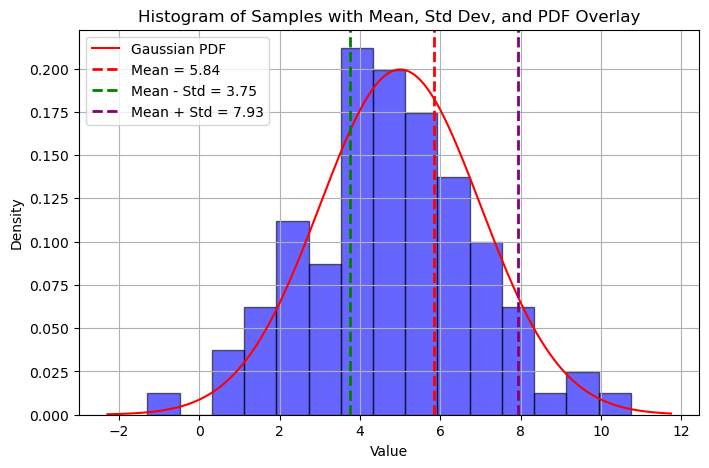

In [81]:
# Re-plotting the histogram with mean, standard deviation markers, and the theoretical Gaussian PDF overlay.

# Plotting the histogram of samples
plt.figure(figsize=(8, 5))
plt.hist(samples, bins=15, density=True, alpha=0.6, color='blue', edgecolor='black')

# Overlaying the Gaussian PDF
x = np.linspace(min(samples)-1, max(samples)+1, 1000)
plt.plot(x, gauss1.pdf(x), 'r-', label='Gaussian PDF')

# Overlaying vertical lines for the mean and standard deviation
plt.axvline(sample_mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {sample_mean:.2f}')
plt.axvline(sample_mean - sample_std, color='green', linestyle='--', linewidth=2, label=f'Mean - Std = {sample_mean - sample_std:.2f}')
plt.axvline(sample_mean + sample_std, color='purple', linestyle='--', linewidth=2, label=f'Mean + Std = {sample_mean + sample_std:.2f}')

# Add labels, title, and legend
plt.title('Histogram of Samples with Mean, Std Dev, and PDF Overlay')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

[Back to top](#Index:) 

### Plotting the Distribution and Sample

The plot below shows the distribution of the data used in this activity.

![](images/distandsamples.png)

The distribution created is centered at 5 with a standard deviation of 2.  By properties of the normal distribution, 99% of the data will be with $\pm ~ 3\sigma$.  Accordingly, an array `x` is created using `np.linspace` with 1000 evenly spaced values $\mu \pm 3\sigma$ (plus and minus three standard deviations from the mean).  

The code to create the plot above is given below:




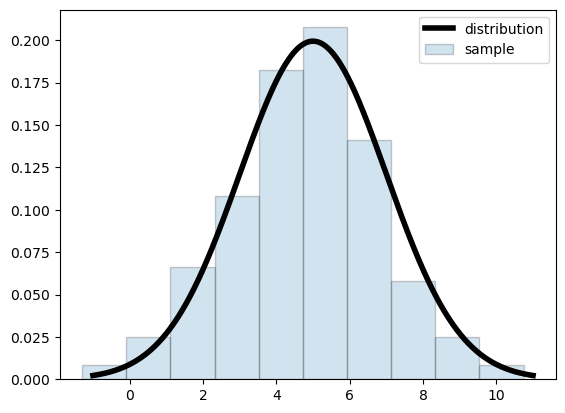

In [33]:
x = np.linspace(-1, 11, 1000)
plt.plot(x, gauss1.pdf(x), color = 'black', linewidth = 4, label = 'distribution')
plt.hist(samples, density=True, alpha = 0.2, bins = 10, edgecolor = 'black', label = 'sample')
plt.legend();


## Codio Activity 2.3: The Law of Large Numbers

**Expected Time: 45 Minutes**

**Total Points: 10**

In this activity, you will draw increasingly sized samples from a given distribution.  These samples means will be tracked, and compared to that which is known from the larger distribution.  You are to use the `scipy.stats` module and its distribution objects to produce these distributions and their samples.

## Index:

- [Problem 1](#Problem-1:-A-Uniform-Distribution)
- [Problem 2](#Problem-2:-Loop-of-Samples)
- [Problem 3](#Problem-3:-Comparing-the-sample-means-to-actual)
- [Problem 4](#Problem-4:-Distribution-of-Sample-Means)
- [Problem 5](#Problem-5:-Repeat-with-Gaussian-Distribution)


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm

[Back to top](#Index:) 

### Problem 1: A Uniform Distribution

**2 Points**


Use the `uniform` function to create a uniform distribution with `loc = 5` and `scale = 10`.  Assign your results as a distribution object to the variale `dist1` below. 

Done correctly, this code will produce uniformly distributed points between 5 and 15 with mean at 10.

In [89]:
### GRADED

dist1 = ''

### BEGIN SOLUTION
dist1 = uniform(loc = 5, scale = 10)
### END SOLUTION

# Answer check
print(type(dist1))

<class 'scipy.stats._distn_infrastructure.rv_continuous_frozen'>


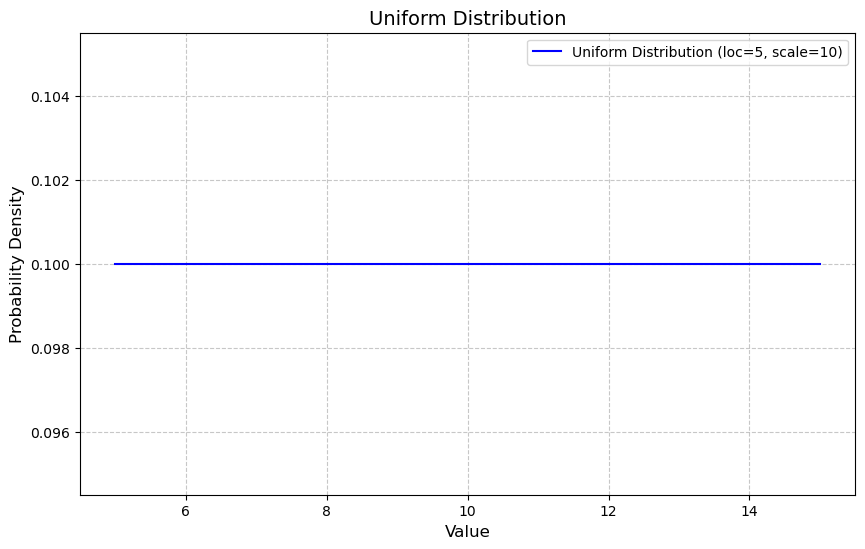

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Define the distribution
dist1 = uniform(loc=5, scale=10)

# Generate data for plotting the distribution
x = np.linspace(5, 15, 1000)  # Range of the distribution
y = dist1.pdf(x)  # Probability density function (PDF)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue', label='Uniform Distribution (loc=5, scale=10)')
plt.title('Uniform Distribution', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.show()

###  Problem 2: Loop of Samples

**2 Points**

Use a `for` loop to generate samples of sizes from 1 to 500. Inside the `for` loop, use the `.rvs` method on `dist1` to return a random sample. Inside the `.rvs` method set `random_state` equal to 22.  Use `np.mean` to compute the sample mean of each sample size. Append each sample mean to the list `sample_means`.  

In [37]:
### GRADED

sample_means = []

#loop over values 1 - 500

    #generate samples 
    #remember the random_state
    
    #find sample mean
    
    #append mean to sample_means

### BEGIN SOLUTION
dist1 = uniform(loc = 5, scale = 10)
sample_means = []
for i in range(1, 501):
    sample = dist1.rvs(i, random_state = 22)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
### END SOLUTION

# Answer check
print(type(sample_means))
print(sample_means[:5], '\n', sample_means[-5:])

<class 'list'>
[7.084605373588426, 8.450707995611044, 8.702265448121944, 9.924654082394818, 9.2820463731392] 
 [9.917152492762177, 9.92702320427582, 9.923037839990696, 9.921343577252099, 9.926403777871194]


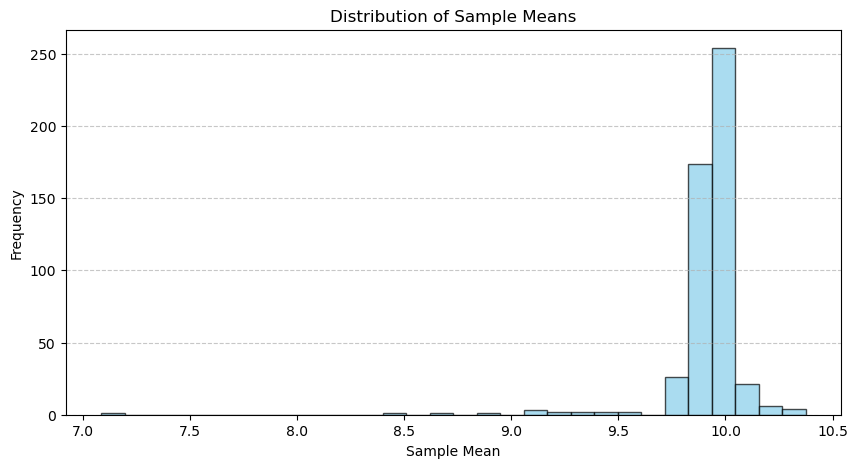

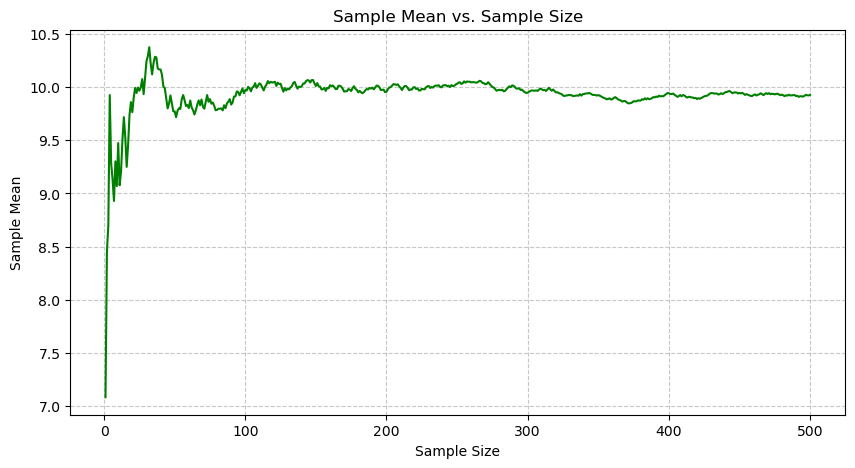

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Generate the sample means
dist1 = uniform(loc=5, scale=10)
sample_means = []

for i in range(1, 501):
    sample = dist1.rvs(i, random_state=22)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

# Plotting

# Histogram of Sample Means
plt.figure(figsize=(10, 5))
plt.hist(sample_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Line Plot of Sample Mean vs. Sample Size
plt.figure(figsize=(10, 5))
plt.plot(range(1, 501), sample_means, color='green')
plt.title('Sample Mean vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Sample Mean')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

### Problem 3: Comparing the sample means to the actual mean

**2 Points**

Note that the actual mean of our data is 10.  

Does the sample mean approximate to the true mean with an error of less than .1 when the sample size is equal to 400?  Assign your answer as a boolean value to `ans3` below -- True for yes, False for no.  

To help you with this exercise, the results of the sample mean are plot below:

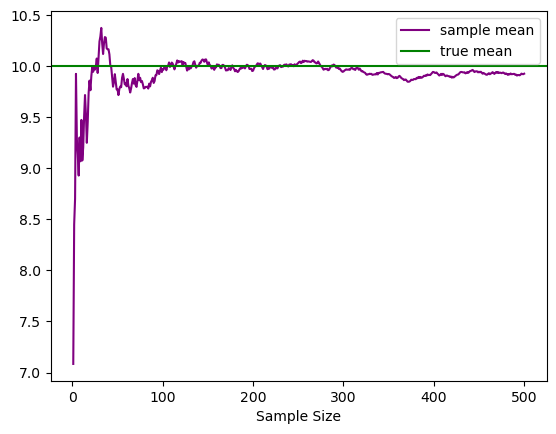

In [39]:
plt.plot(range(1, 501), sample_means, label = 'sample mean', color = 'purple')
plt.axhline(10, label = 'true mean', color = 'green')
plt.xlabel('Sample Size')
plt.legend();

In [40]:
### GRADED

ans3 = ''

### BEGIN SOLUTION
ans3 = abs(sample_means[399] - 10) < .1
### END SOLUTION

# Answer check
print(type(ans3))

<class 'numpy.bool_'>


The purpose of this snippet is to verify if the 400th sample mean is "close" to 10, with a tolerance of 0.1. This kind of check might be used to confirm convergence properties or the accuracy of the simulation.

### Problem 4: Distribution of Sample Means

**2 Points**

As you notice in the plot above, there is larger variation in the small sample sizes.  As the lectures suggest, consider only those samples of size 30 or more and compute their mean and standard deviation.  

Assign the samples of size 30 or more as a list to the variable `samples_30_or_more` below.

Use `np.mean()` to compute the mean and assign the result to the variable `samples_mean`.

Use `np.std()` to compute the standard deviation and assign the result to the variable `samples_std`.

Uncomment the code to see a histogram of these sample means.  

HINT: remember that Python starts counting at 0, so using `sample_means[30:]` is actually incorrect.

In [42]:
### GRADED

samples_30_or_more = ''
samples_mean = ''
samples_std = ''


### BEGIN SOLUTION
samples_30_or_more = sample_means[29:]
samples_mean = np.mean(samples_30_or_more)
samples_std = np.std(samples_30_or_more)
### END SOLUTION

#plt.hist(samples_30_or_more, edgecolor = 'black', alpha = 0.3)
#plt.title('Distribution of Sample Means');

# Answer check
print(type(samples_30_or_more))
print(samples_mean)
print(samples_std)

<class 'list'>
9.955489061213552
0.07692775219192274


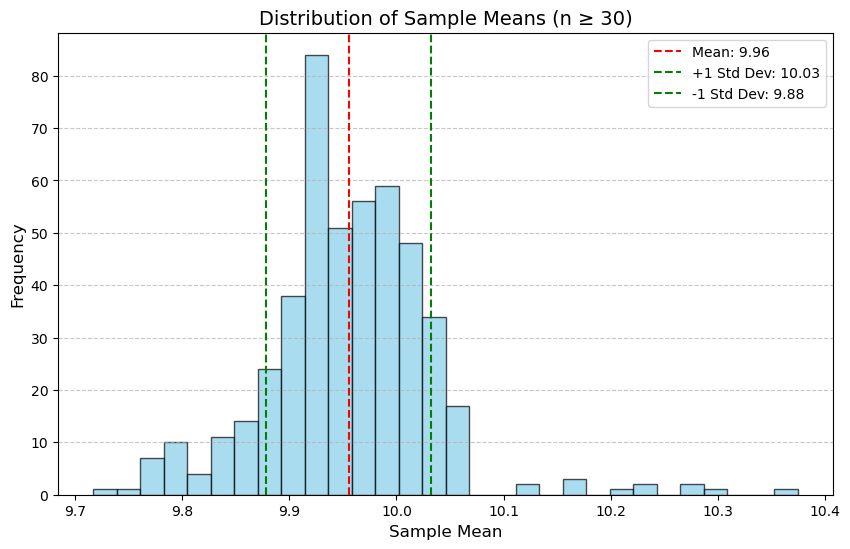

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Generate sample means
dist1 = uniform(loc=5, scale=10)
sample_means = []

for i in range(1, 501):
    sample = dist1.rvs(i, random_state=22)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

# Solution
samples_30_or_more = sample_means[29:]  # samples of size 30 or more
samples_mean = np.mean(samples_30_or_more)
samples_std = np.std(samples_30_or_more)

# Plot
plt.figure(figsize=(10, 6))
plt.hist(samples_30_or_more, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(samples_mean, color='red', linestyle='--', label=f'Mean: {samples_mean:.2f}')
plt.axvline(samples_mean + samples_std, color='green', linestyle='--', label=f'+1 Std Dev: {samples_mean + samples_std:.2f}')
plt.axvline(samples_mean - samples_std, color='green', linestyle='--', label=f'-1 Std Dev: {samples_mean - samples_std:.2f}')
plt.title('Distribution of Sample Means (n ≥ 30)', fontsize=14)
plt.xlabel('Sample Mean', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Problem 5: Repeat with Gaussian Distribution

**2 Points**

Now, you are to repeat the above exercise using samples from a Guassian distribution


Use the fucntion `norm` with argument `loc` equal to five and `scale` equal to ten to define a Gaussian distribution and assign the result to `gauss_dist`.

Use a `for` loop to generate samples of sizes from 30 to 500. Inside the `for` loop, use the `.rvs` method on `gauss_dist` to return a random sample. Inside the `.rvs` method set `random_state` equal to 22.  Use `np.mean` to compute the sample mean of each sample size. Append each sample mean to the list `sample_means_gauss`.  

Outside the `for` loop, use `np.mean()` to compute the mean and assign the result to the variable `gauss_mean`.

Outside the `for` loop, use `np.std()` to compute the standard deviation and assign the result to the variable `gauss_standard_deviation`.

In [44]:
### GRADED

gauss_dist = ''
sample_means_gauss = []

#create the distribution object

#loop over values 30 - 500

    #generate samples 
    #remember the random_state
    
    #find sample mean
    
    #append mean to sample_means

gauss_mean = ''
gauss_standard_deviation = ''


### BEGIN SOLUTION
gauss_dist = norm(loc = 5, scale = 10)
sample_means_gauss = []
for i in range(30, 501):
    sample = gauss_dist.rvs(i, random_state = 22)
    sample_mean = np.mean(sample)
    sample_means_gauss.append(sample_mean)
    
gauss_mean = np.mean(sample_means_gauss)
gauss_standard_deviation = np.std(sample_means_gauss)
### END SOLUTION

# Answer check
print(type(sample_means_gauss))
print(sample_means_gauss[:5], '\n', sample_means_gauss[-5:])
print(gauss_mean)
print(gauss_standard_deviation)

<class 'list'>
[5.711989769815023, 6.495208371007466, 5.670348611610735, 5.578864596890512, 5.5331440323908465] 
 [5.852122426344829, 5.842782955969857, 5.840843359217325, 5.83415378557203, 5.841178380882505]
5.56850847319431
0.5371819419572756


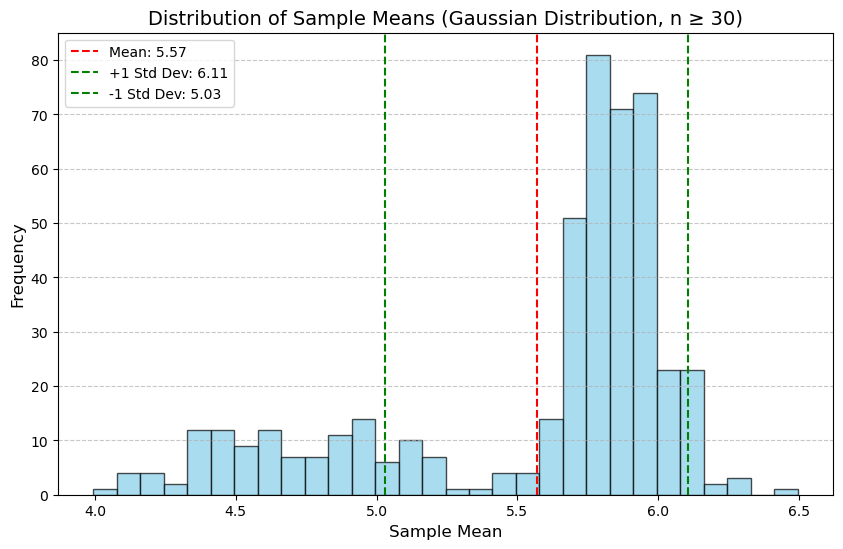

In [92]:
from scipy.stats import norm

# Create Gaussian distribution and calculate sample means
gauss_dist = norm(loc=5, scale=10)
sample_means_gauss = []
for i in range(30, 501):
    sample = gauss_dist.rvs(i, random_state=22)
    sample_mean = np.mean(sample)
    sample_means_gauss.append(sample_mean)

# Calculate the mean and standard deviation of the sample means
gauss_mean = np.mean(sample_means_gauss)
gauss_standard_deviation = np.std(sample_means_gauss)

# Plot the histogram of sample means
plt.figure(figsize=(10, 6))
plt.hist(sample_means_gauss, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(gauss_mean, color='red', linestyle='--', label=f'Mean: {gauss_mean:.2f}')
plt.axvline(gauss_mean + gauss_standard_deviation, color='green', linestyle='--', label=f'+1 Std Dev: {gauss_mean + gauss_standard_deviation:.2f}')
plt.axvline(gauss_mean - gauss_standard_deviation, color='green', linestyle='--', label=f'-1 Std Dev: {gauss_mean - gauss_standard_deviation:.2f}')
plt.title('Distribution of Sample Means (Gaussian Distribution, n ≥ 30)', fontsize=14)
plt.xlabel('Sample Mean', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Codio Activity 2.4: Measures of Center and Spread with `pandas`

**Expected Time: 60 Minutes**

**Total Points: 20**

Measures of central tendency for datasets are typically mean, median, mode, variance, and standard deviation. We will explore mode in later modules. This assignment focuses on using pandas to compute numerical summaries of data. You will load in a dataset and compute the mean, median, variance, and standard deviation of numeric features in the data. You will also examine the spread of the data using quartiles and the interquartile range, also identifying outliers using the  1.5×𝐼𝑄𝑅  rule.


## Index:

- [Problem 1](#Problem-1:-Load-the-Data)
- [Problem 2](#Problem-2:-Base-Salary-Distribution-Mean)
- [Problem 3](#Problem-3:-Base-Salary-Distribution-Median)
- [Problem 4](#Problem-4:-Determining-Quartiles)
- [Problem 5](#Problem-5:-Interquartile-Range)
- [Problem 6](#Problem-6:-Rule-for-Outliers)
- [Problem 7](#Problem-7:-Dropping-Outliers)
- [Problem 8](#Finding-the-Mean-with-no-Outliers)
- [Problem 9]()
- [Problem 10](#Standard-Deviation-with-`numpy`)
- [Problem 11](#Standard-Deviation-with-`pandas`)
- [Problem 12]()
- [Problem 13](#Measure-of-Center)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### The Data


![](images/payroll.png)
The dataset for this assignment comes from New York City's Open Data, and contains information about the citywide payroll data.  Below, you are to load the data from a `.csv` file.  

[Back to top](#Index:) 

### Problem 1:  Load the Data

**1 Point**

Below, load the data file located in the `data` folder named `nyc_salaries.csv`.  Assign your DataFrame to `nyc_salary_data`.

In [142]:
###GRADED

nyc_salary_data = ''

###BEGIN SOLUTION
nyc_salary_data = pd.read_csv('nyc_salaries.csv')
###END SOLUTION

In [98]:
nyc_salary_data.head()

fiscal_year  payroll_number                     agency_name  last_name  \
0         2020              17  OFFICE OF EMERGENCY MANAGEMENT    BEREZIN   
1         2020              17  OFFICE OF EMERGENCY MANAGEMENT     GEAGER   
2         2020              17  OFFICE OF EMERGENCY MANAGEMENT     RAMANI   
3         2020              17  OFFICE OF EMERGENCY MANAGEMENT      ROTTA   
4         2020              17  OFFICE OF EMERGENCY MANAGEMENT  WILSON II   

  first_name        agency_start_date work_location_borough  \
0    MIKHAIL  2015-08-10T00:00:00.000              BROOKLYN   
1   VERONICA  2016-09-12T00:00:00.000              BROOKLYN   
2   SHRADDHA  2016-02-22T00:00:00.000              BROOKLYN   
3   JONATHAN  2013-09-16T00:00:00.000              BROOKLYN   
4     ROBERT  2018-04-30T00:00:00.000              BROOKLYN   

                title_description leave_status_as_of_july_31  base_salary  \
0  EMERGENCY PREPAREDNESS MANAGER                     ACTIVE      86005.0   
1  EMERGENCY PREPAREDNESS MANAGER                     ACTIVE      86005.0   
2  EMERGENCY PREPAREDNESS MANAGER                     ACTIVE      86005.0   
3  EMERGENCY PREPAREDNESS MANAGER                     ACTIVE      86005.0   
4  EMERGENCY PREPAREDNESS MANAGER                     ACTIVE      86005.0   

   pay_basis  regular_hours  regular_gross_paid  ot_hours  total_ot_paid  \
0  per Annum         1820.0            84698.21       0.0            0.0   
1  per Annum         1820.0            84698.21       0.0            0.0   
2  per Annum         1820.0            84698.21       0.0            0.0   
3  per Annum         1820.0            84698.21       0.0            0.0   
4  per Annum         1820.0            84698.21       0.0            0.0   

   total_other_pay mid_init  
0              0.0      NaN  
1              0.0        M  
2              0.0      NaN  
3              0.0        D  
4              0.0        P

<Axes: title={'center': 'Average Regular Gross Paid by Borough'}, xlabel='work_location_borough'>

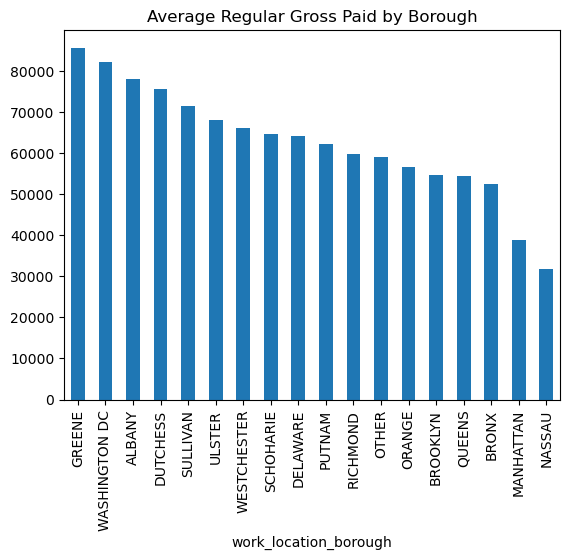

In [111]:
nyc_salary_data.groupby('work_location_borough')['regular_gross_paid'] \
    .mean() \
    .sort_values(ascending=False) \
    .plot(kind='bar', title="Average Regular Gross Paid by Borough")

### Examine the Data

Now that the data is loaded, information about the datatypes and missing values as well as a quick look at the first five rows of the data can be retrieved using the `.info()` and `.head()` methods.

In [4]:
nyc_salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590210 entries, 0 to 590209
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   fiscal_year                 590210 non-null  int64  
 1   payroll_number              590210 non-null  int64  
 2   agency_name                 590210 non-null  object 
 3   last_name                   589838 non-null  object 
 4   first_name                  589835 non-null  object 
 5   agency_start_date           590147 non-null  object 
 6   work_location_borough       590207 non-null  object 
 7   title_description           590204 non-null  object 
 8   leave_status_as_of_july_31  590210 non-null  object 
 9   base_salary                 590210 non-null  float64
 10  pay_basis                   590210 non-null  object 
 11  regular_hours               590210 non-null  float64
 12  regular_gross_paid          590210 non-null  float64
 13  ot_hours      

In [5]:
nyc_salary_data.head()

fiscal_year  payroll_number                     agency_name  last_name  \
0         2020              17  OFFICE OF EMERGENCY MANAGEMENT    BEREZIN   
1         2020              17  OFFICE OF EMERGENCY MANAGEMENT     GEAGER   
2         2020              17  OFFICE OF EMERGENCY MANAGEMENT     RAMANI   
3         2020              17  OFFICE OF EMERGENCY MANAGEMENT      ROTTA   
4         2020              17  OFFICE OF EMERGENCY MANAGEMENT  WILSON II   

  first_name        agency_start_date work_location_borough  \
0    MIKHAIL  2015-08-10T00:00:00.000              BROOKLYN   
1   VERONICA  2016-09-12T00:00:00.000              BROOKLYN   
2   SHRADDHA  2016-02-22T00:00:00.000              BROOKLYN   
3   JONATHAN  2013-09-16T00:00:00.000              BROOKLYN   
4     ROBERT  2018-04-30T00:00:00.000              BROOKLYN   

                title_description leave_status_as_of_july_31  base_salary  \
0  EMERGENCY PREPAREDNESS MANAGER                     ACTIVE      86005.0   
1  EMERGENCY PREPAREDNESS MANAGER                     ACTIVE      86005.0   
2  EMERGENCY PREPAREDNESS MANAGER                     ACTIVE      86005.0   
3  EMERGENCY PREPAREDNESS MANAGER                     ACTIVE      86005.0   
4  EMERGENCY PREPAREDNESS MANAGER                     ACTIVE      86005.0   

   pay_basis  regular_hours  regular_gross_paid  ot_hours  total_ot_paid  \
0  per Annum         1820.0            84698.21       0.0            0.0   
1  per Annum         1820.0            84698.21       0.0            0.0   
2  per Annum         1820.0            84698.21       0.0            0.0   
3  per Annum         1820.0            84698.21       0.0            0.0   
4  per Annum         1820.0            84698.21       0.0            0.0   

   total_other_pay mid_init  
0              0.0      NaN  
1              0.0        M  
2              0.0      NaN  
3              0.0        D  
4              0.0        P

[Back to top](#Index:) 

### Problem 2: Base Salary Distribution Mean

**1 Point**

Use pandas to determine the mean of the `base_salary` column.  Assign your answer to the variable `ans_2` below.

<Axes: >

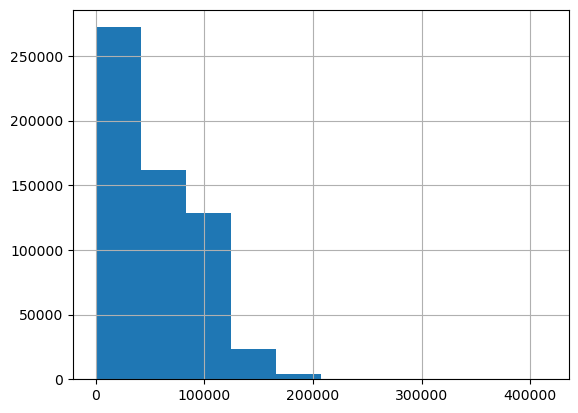

In [6]:
nyc_salary_data['base_salary'].hist()

In [34]:
###GRADED

ans_2 = ''

###BEGIN SOLUTION
ans_2 = nyc_salary_data['base_salary'].mean()
###END SOLUTION

print(ans_2)

46719.46439313127


[Back to top](#Index:) 

### Problem 3: Base Salary Distribution Median


**1 Point**


Use the pandas `.median()` method to find the median of the `base_salary` column. Assign your answer to the variable `ans_3` below.

In [113]:
###GRADED

ans_3 = ''

###BEGIN SOLUTION
ans_3 = nyc_salary_data['base_salary'].median()
###END SOLUTION

<Axes: xlabel='work_location_borough'>

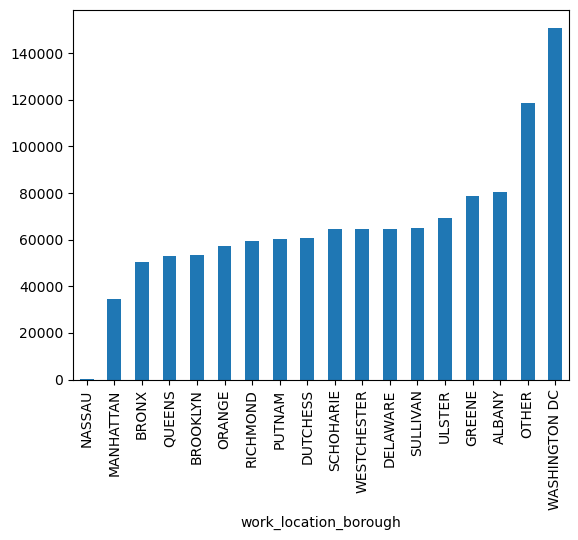

In [127]:
nyc_salary_data.groupby('work_location_borough')['base_salary'].median().sort_values().plot(kind='bar')

[Back to top](#Index:) 

### Problem 4: Determining Quartiles

**2 Points**

The first quartile in our data is found by arranging the data from least to greatest and determining the median of the lower half of the data.  

The third quartile is the median of the upper half of the data.  

Pandas has a `.quantile()` method that accepts an argument as a single value or list of values of quantiles to compute.  

- Use the `.quantile()` method  with argument equal to `.25` to determine the first quartile of the `base_salary` column. Assign your answer to the variable `first_quartile`.
- Use the `.quantile()` method  with argument equal to `.75` to determine the third quartile of the `base_salary` column. Assign your answer to the variable `third_quartile`.



In [11]:
###GRADED

first_quartile = ''
third_quartile = ''

###BEGIN SOLUTION
first_quartile = nyc_salary_data['base_salary'].quantile(.25)
third_quartile = nyc_salary_data['base_salary'].quantile(.75)
###END SOLUTION

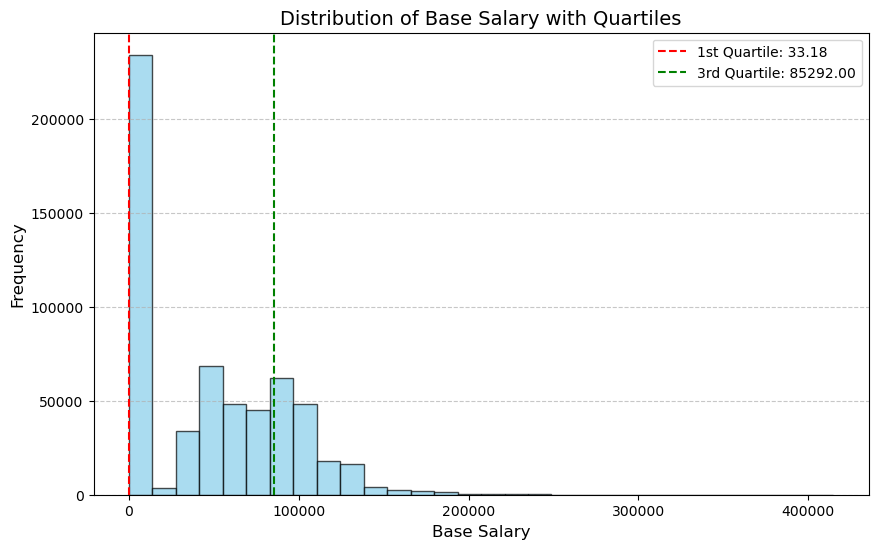

In [128]:
# Calculate the first and third quartiles of 'base_salary'
first_quartile = nyc_salary_data['base_salary'].quantile(0.25)
third_quartile = nyc_salary_data['base_salary'].quantile(0.75)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(nyc_salary_data['base_salary'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(first_quartile, color='red', linestyle='--', label=f'1st Quartile: {first_quartile:.2f}')
plt.axvline(third_quartile, color='green', linestyle='--', label=f'3rd Quartile: {third_quartile:.2f}')
plt.title('Distribution of Base Salary with Quartiles', fontsize=14)
plt.xlabel('Base Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

[Back to top](#Index:) 

### Problem 5: Interquartile Range

**1 Point**

The Interquartile Range (IQR) is the difference between the third and first quartile:

$$\text{IQR} = Q_3 - Q_1$$


Use your work from Problem 4 to determine the IQR for the `base_salary` column and assign it to the `iqr` variable below.

In [130]:
###GRADED

iqr = ''

###BEGIN SOLUTION
iqr = nyc_salary_data['base_salary'].quantile(.75) - nyc_salary_data['base_salary'].quantile(.25)
###END SOLUTION

print(iqr)

85258.82


[Back to top](#Index:) 

### Problem 6: Rule for Outliers

**2 Points**

We can use the IQR to determine boundaries for outliers. As a rule of thumb, any values greater than the third quartile plus $1.5 \times IQR$ or any values that are less than the first quartile by $1.5 \times IQR$  are considered outliers.  

Calculate the lower and upper boundaries for outliers for the `base_salary` column using the IQR rule above.

Assign your solutions to the variables `lower` and `upper` below.

In [131]:
###GRADED

lower = ''
upper = ''

###BEGIN SOLUTION
first_quartile = nyc_salary_data['base_salary'].quantile(.25)
third_quartile = nyc_salary_data['base_salary'].quantile(.75)
iqr = nyc_salary_data['base_salary'].quantile(.75) - nyc_salary_data['base_salary'].quantile(.25)
lower = first_quartile - 1.5*iqr
upper = third_quartile + 1.5*iqr
###END SOLUTION

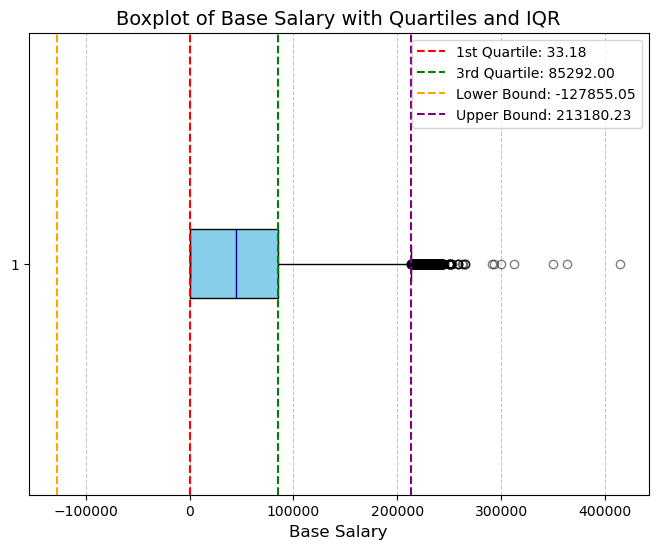

In [132]:
# Calculate the quartiles and IQR
first_quartile = nyc_salary_data['base_salary'].quantile(0.25)
third_quartile = nyc_salary_data['base_salary'].quantile(0.75)
iqr = third_quartile - first_quartile  # Interquartile range
lower_bound = first_quartile - 1.5 * iqr
upper_bound = third_quartile + 1.5 * iqr

# Plot a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(nyc_salary_data['base_salary'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'),
            flierprops=dict(marker='o', color='red', alpha=0.5),
            medianprops=dict(color='darkblue'))

# Add annotations for quartiles and outliers
plt.axvline(first_quartile, color='red', linestyle='--', label=f'1st Quartile: {first_quartile:.2f}')
plt.axvline(third_quartile, color='green', linestyle='--', label=f'3rd Quartile: {third_quartile:.2f}')
plt.axvline(lower_bound, color='orange', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
plt.axvline(upper_bound, color='purple', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')

# Add labels and title
plt.title('Boxplot of Base Salary with Quartiles and IQR', fontsize=14)
plt.xlabel('Base Salary', fontsize=12)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

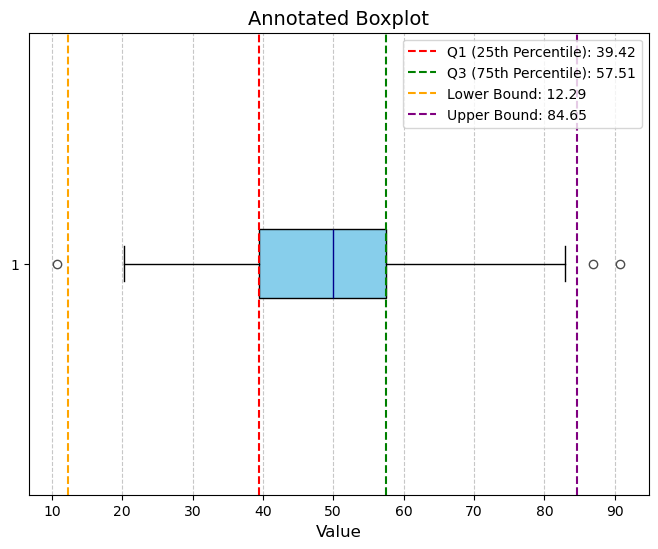

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
data = np.random.normal(loc=50, scale=15, size=200)  # Example data

# Calculate quartiles, IQR, and bounds
q1 = np.percentile(data, 25)  # First quartile (25th percentile)
q3 = np.percentile(data, 75)  # Third quartile (75th percentile)
iqr = q3 - q1  # Interquartile Range
lower_bound = q1 - 1.5 * iqr  # Lower whisker limit
upper_bound = q3 + 1.5 * iqr  # Upper whisker limit

# Create the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data, vert=False, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'),
            flierprops=dict(marker='o', color='red', alpha=0.7),
            medianprops=dict(color='darkblue'))

# Add annotations for quartiles and fences
plt.axvline(q1, color='red', linestyle='--', label=f'Q1 (25th Percentile): {q1:.2f}')
plt.axvline(q3, color='green', linestyle='--', label=f'Q3 (75th Percentile): {q3:.2f}')
plt.axvline(lower_bound, color='orange', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
plt.axvline(upper_bound, color='purple', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')
plt.title('Annotated Boxplot', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


#Outliers:
#Data points outside the whisker range ( 𝑄1−1.5×𝐼𝑄𝑅Q1−1.5×IQR or 𝑄3+1.5×𝐼𝑄𝑅Q3+1.5×IQR).

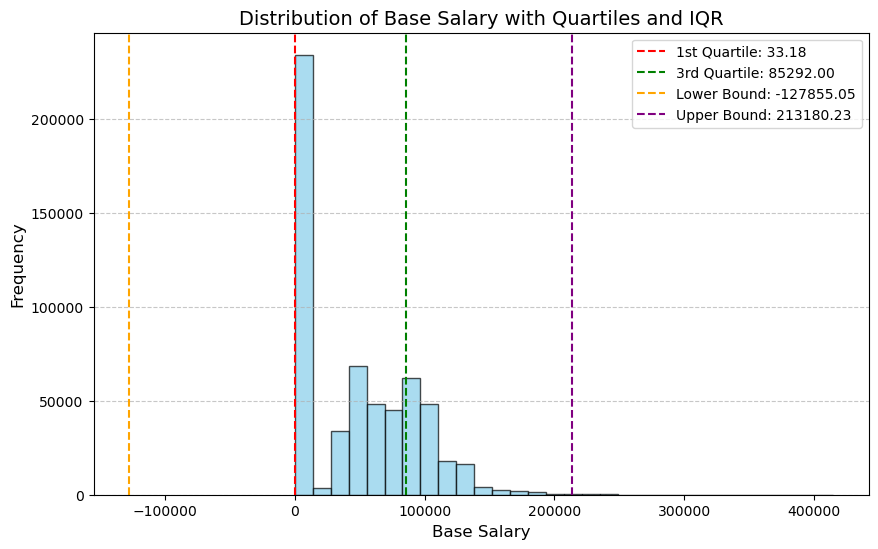

In [133]:
plt.figure(figsize=(10, 6))
plt.hist(nyc_salary_data['base_salary'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(first_quartile, color='red', linestyle='--', label=f'1st Quartile: {first_quartile:.2f}')
plt.axvline(third_quartile, color='green', linestyle='--', label=f'3rd Quartile: {third_quartile:.2f}')
plt.axvline(lower_bound, color='orange', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
plt.axvline(upper_bound, color='purple', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')
plt.title('Distribution of Base Salary with Quartiles and IQR', fontsize=14)
plt.xlabel('Base Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

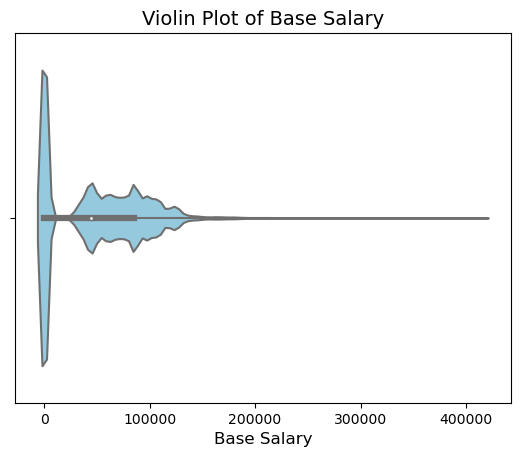

In [134]:
import seaborn as sns
sns.violinplot(x=nyc_salary_data['base_salary'], color='skyblue')
plt.title('Violin Plot of Base Salary', fontsize=14)
plt.xlabel('Base Salary', fontsize=12)
plt.show()

/var/folders/0y/y7x747912cx8gf89wbjpbfnh0000gn/T/ipykernel_95780/3053516744.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nyc_salary_data['base_salary'], shade=True, color='skyblue')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


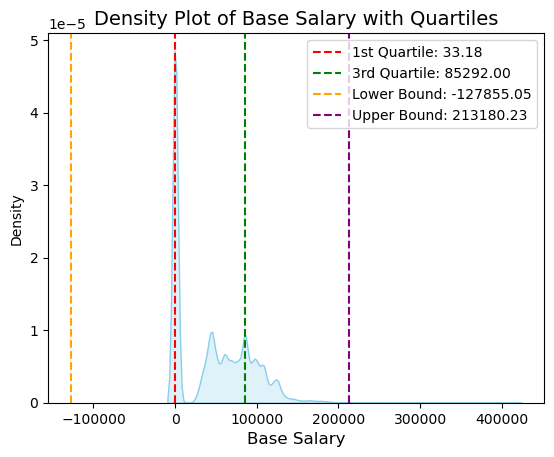

In [135]:
sns.kdeplot(nyc_salary_data['base_salary'], shade=True, color='skyblue')
plt.axvline(first_quartile, color='red', linestyle='--', label=f'1st Quartile: {first_quartile:.2f}')
plt.axvline(third_quartile, color='green', linestyle='--', label=f'3rd Quartile: {third_quartile:.2f}')
plt.axvline(lower_bound, color='orange', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
plt.axvline(upper_bound, color='purple', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')
plt.title('Density Plot of Base Salary with Quartiles', fontsize=14)
plt.xlabel('Base Salary', fontsize=12)
plt.legend()
plt.show()

[Back to top](#Index:) 

### Problem 7: Dropping Outliers


**1 Point**


With the upper and lower boundaries in place, drop the outliers from the dataset.  

Use the pandas `loc[]` method to limit the data in the `base_salary` column based on the outliers bounds using the $1.5 \times IQR$ rule.  

Assign the resulting DataFrame to `salaries_no_outlier` below.

In [146]:
###GRADED

salaries_no_outlier = ''

###BEGIN SOLUTION
first_quartile = nyc_salary_data['base_salary'].quantile(.25)
third_quartile = nyc_salary_data['base_salary'].quantile(.75)
iqr = nyc_salary_data['base_salary'].quantile(.75) - nyc_salary_data['base_salary'].quantile(.25)
lower = first_quartile - 1.5*iqr
upper = third_quartile + 1.5*iqr
salaries_no_outlier = nyc_salary_data.loc[(nyc_salary_data['base_salary']>lower) & (nyc_salary_data['base_salary']<upper)]

###END SOLUTION

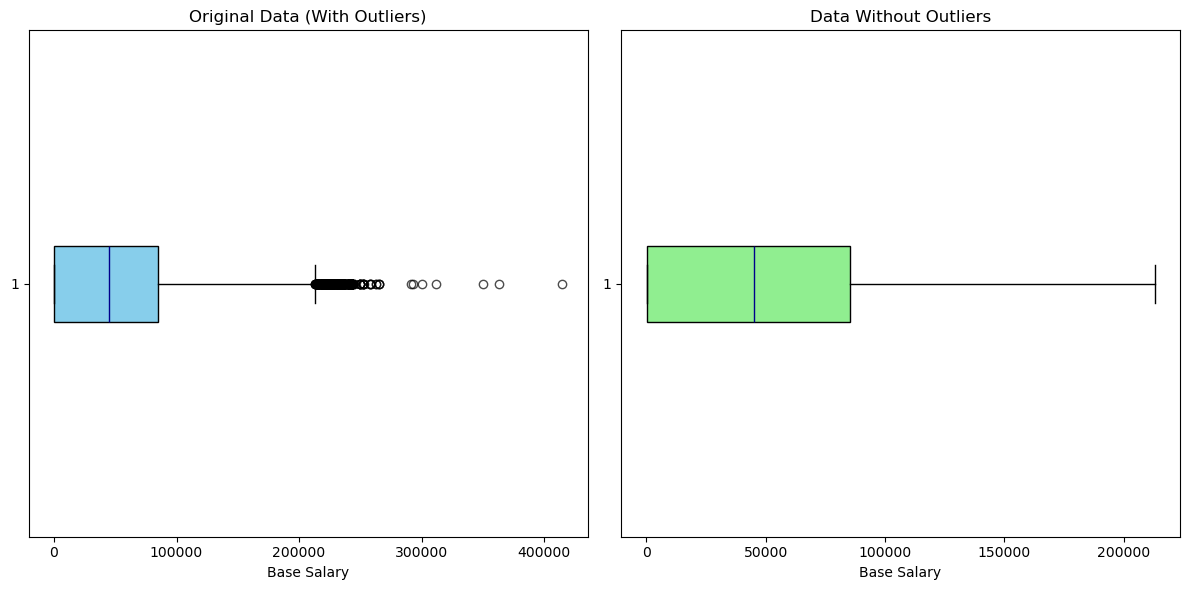

In [147]:
import matplotlib.pyplot as plt

# Calculate the IQR, lower, and upper bounds
first_quartile = nyc_salary_data['base_salary'].quantile(0.25)
third_quartile = nyc_salary_data['base_salary'].quantile(0.75)
iqr = third_quartile - first_quartile
lower = first_quartile - 1.5 * iqr
upper = third_quartile + 1.5 * iqr

# Remove outliers
salaries_no_outlier = nyc_salary_data.loc[
    (nyc_salary_data['base_salary'] > lower) & (nyc_salary_data['base_salary'] < upper)
]

# Plot side-by-side boxplots
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
plt.boxplot(nyc_salary_data['base_salary'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'),
            flierprops=dict(marker='o', color='red', alpha=0.7),
            medianprops=dict(color='darkblue'))
plt.title('Original Data (With Outliers)', fontsize=12)
plt.xlabel('Base Salary')

# Data without outliers
plt.subplot(1, 2, 2)
plt.boxplot(salaries_no_outlier['base_salary'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='black'),
            flierprops=dict(marker='o', color='red', alpha=0.7),
            medianprops=dict(color='darkblue'))
plt.title('Data Without Outliers', fontsize=12)
plt.xlabel('Base Salary')

plt.tight_layout()
plt.show()


[Back to top](#Index:) 

### Problem 8: Finding the Mean with no Outliers

**1 Point**

Now that the outliers have been removed, use the function `mean()` on the column `base_salary` of `salaries_no_outlier` to find the mean of your data without outliers.  

Assign your answer to `mean_no_outliers` below.

In [149]:
###GRADED

mean_no_outliers = ''

###BEGIN SOLUTION
mean_no_outliers = salaries_no_outlier['base_salary'].mean()
###END SOLUTION
print(mean_no_outliers)
print(nyc_salary_data['base_salary'].mean())

46568.13546421399
46719.46439313127


[Back to top](#Index:) 

### Problem 9: Finding the Median with no Outliers

**2 Points**

Use the function `median()` on the column `base_salary` of `salaries_no_outlier` to find the median of your data without outliers.  

Assign your solution to the variable `median_no_outliers` below.

In [150]:
###GRADED

median_no_outliers = ''

###BEGIN SOLUTION
median_no_outliers = salaries_no_outlier['base_salary'].median()
###END SOLUTION

print(median_no_outliers)
print(nyc_salary_data['base_salary'].median())

44930.0
44930.0


[Back to top](#Index:) 

### Problem 10: Standard Deviation with `numpy`

**2 Points**


An alternative measure for the spread of a dataset to the IQR is the **standard deviation**.  

Both pandas and NumPy have functions for computing the standard deviation, however they have different assumptions about the data.  

- Use the  `np.std()` method to determine the standard deviation of the `base_salary` column of `nyc_salary_data` to compute the standard deviation on the entire dataset.  Assign your result to the variable `std_numpy_outliers` .

- Use the  `np.std()` method to determine the standard deviation of the `base_salary` column of `salaries_no_outlier` to compute the standard deviation on the entire dataset.  Assign your result to the variable `std_numpy_no_outliers` .



In [23]:
###GRADED

std_numpy_outliers = ''
std_numpy_no_outliers = ''

###BEGIN SOLUTION
std_numpy_outliers = np.std(nyc_salary_data['base_salary'])
std_numpy_no_outliers = np.std(salaries_no_outlier['base_salary'])
###END SOLUTION

[Back to top](#Index:) 

### Problem 11: Standard Deviation with `pandas`

**2 Points**



In the next exercise, you will use pandas to determine the standard deviation of the `base_salary` column.  

- Use the  `std()` pandas method to determine the standard deviation of the `base_salary` column of `nyc_salary_data` to compute the standard deviation on the entire dataset.  Assign your result to the variable `std_pandas_outliers` .

- Use the  `std()` pandas method to determine the standard deviation of the `base_salary` column of `salaries_no_outlier` to compute the standard deviation on the entire dataset.  Assign your result to the variable `std_pandas_no_outliers` .



In [25]:
###GRADED

std_pandas_outliers = ''
std_pandas_no_outliers = ''

###BEGIN SOLUTION
std_pandas_outliers = nyc_salary_data['base_salary'].std()
std_pandas_no_outliers = salaries_no_outlier['base_salary'].std()
###END SOLUTION

### Why are these different?

Pandas and NumPy make different assumptions about the data, which is why we receive slightly different results.  This involves the default degree of freedom argument in the functions.  From the numpy docs we have:

```
ddof: int, optional
Means Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements. By default ddof is zero.
```

and from pandas we find:

```
ddof: int, default 1
Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements.
```

The main reason for the different assumptions is motivated by the fact that all the deviations from the mean will add to zero.  This means we would always know the the last deviation if we know the previous $n-1$.  Only $n-1$ are able to vary freely so the average is determined by dividing the total by $n-1$.  In practice the values won't differ greatly, it is important to recognize that there are some different assumptions however.  

[Back to top](#Index:) 

### Problem 12: Calculating the Mode

**2 Points**

Determine the mode of the `nyc_salary_data` DataFrame and assign the result to `df_mode`.



In [27]:
###GRADED

df_mode = ''


###BEGIN SOLUTION
df_mode = nyc_salary_data.mode()
###END SOLUTION

#df_mode

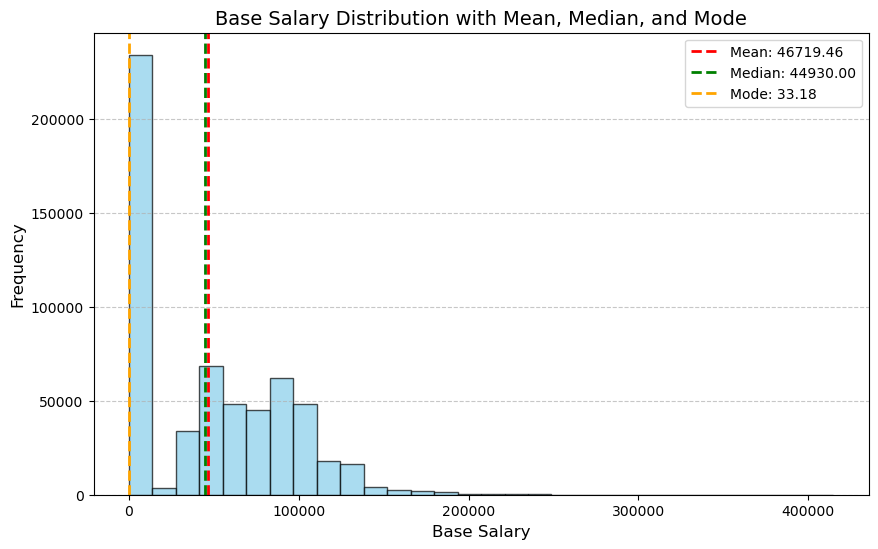

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace with actual path or variable)
# Example: nyc_salary_data = pd.read_csv('nyc_salaries.csv')

# Calculate mean, median, and mode
mean_salary = nyc_salary_data['base_salary'].mean()
median_salary = nyc_salary_data['base_salary'].median()
mode_salary = nyc_salary_data['base_salary'].mode().iloc[0]  # Take the first mode

# Plot histogram with mean, median, and mode
plt.figure(figsize=(10, 6))
plt.hist(nyc_salary_data['base_salary'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_salary, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_salary:.2f}')
plt.axvline(median_salary, color='green', linestyle='--', linewidth=2, label=f'Median: {median_salary:.2f}')
plt.axvline(mode_salary, color='orange', linestyle='--', linewidth=2, label=f'Mode: {mode_salary:.2f}')
plt.title('Base Salary Distribution with Mean, Median, and Mode', fontsize=14)
plt.xlabel('Base Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### A Second Small Example

The data below relates to salmon smolts (young salmon) and the reflectance of their skin as a measure for readiness for migration.

In [155]:
smolt = pd.read_csv('smolts.csv', index_col=  0)

In [156]:
smolt.head()

Reflectance
ID             
1      57.62747
2      54.83248
3      63.44216
4      57.01707
5      54.71893

[Back to top](#Index:) 

### Problem 13: Measure of Center

**2 Points**


Determine the mean and median of the `Reflectance` column, save these to the variable `smolt_mean` and `smolt_median` below.  

In [157]:
###GRADED

smolt_mean = ''
smolt_median = ''

###BEGIN SOLUTION
smolt_mean = smolt['Reflectance'].mean()
smolt_median = smolt['Reflectance'].median()

###END SOLUTION

## Codio Activity 2.5: Plotting Multivariate Datasets

**Expected Time: 60 Minutes**

**Total Points: 14**


In this activity you will focus on creating histograms and scatterplots using `matplotlib`.  You are to generate these plots both using standard plotting commands and the utilities with pandas DataFrame's to plot as a DataFrame method.  Finally, you will customize elements of the plots using additional `matplotlib` functions.


## Index:

- [Problem 1](#Problem-1:-Load-the-Data)
- [Problem 2](#Problem-2:-Features-for-Histograms)
- [Problem 3](#Problem-3:-Histogram-of-Life-Expectancy)
- [Problem 4](#Problem-4:-Adding-a-title-and-human-readable-label)
- [Problem 5](#Problem-5:-Histogram-of-GDP)
- [Problem 6](#Problem-6:-`pandas`-histogram)
- [Problem 7](#Problem-7:-`pandas`-scatterplot)

In [158]:
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Dataset: Gapminder

![](images/gapminder-logo.svg)
The data below has been extracted from the [*gapminder*](https://www.gapminder.org/) organization.  Documentation for the larger data sources can be found [here](https://www.gapminder.org/data/documentation/) and the implementation of the data as a python library [here](https://pypi.org/project/gapminder/).  The data contains information on the Gross Domestic Product, Life Expectancy, and Population in five year intervals for countries around the world.

[Back to top](#Index:) 

### Problem 1: Load the Data

**2 Points**


The dataset is available in the `data` folder and is named `gapminder.csv`. Load this in as `gap_df` below.  

In [161]:
### GRADED

gap_df = ''

### BEGIN SOLUTION
gap_df = pd.read_csv('gapminder.csv')
### END SOLUTION

[Back to top](#Index:) 

### Problem 2: Features for Histograms

**2 Points**

A histogram is a plot that is appropriate for continuous numeric features.  Examine the data and determine a list of columns that are eligible for drawing histograms.  Save your answer as a list of strings that match the column names exactly to `hist_columns` below.

```python
hist_columns = ['col_name_1', 'col_name_2', ...]
```

In [162]:
### GRADED

hist_columns = ''

### BEGIN SOLUTION
hist_columns = ['lifeExp', 'pop', 'gdpPercap']
### END SOLUTION

# Answer check
print(type(hist_columns)) ##should be list

<class 'list'>


[Back to top](#Index:) 

### Problem 3: Histogram of Life Expectancy

**2 Points**

Use `plt.hist()` to create a histogram of the `lifeExp` column.  Use the `plt.savefig()` method to save the image as `life_exp_hist.png` in the `images` folder.


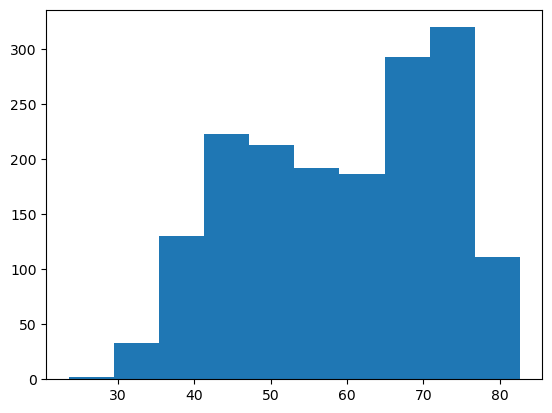

In [170]:
### GRADED

### BEGIN SOLUTION
plt.hist(gap_df['lifeExp'])
plt.savefig('life_exp_hist.png')

### END SOLUTION
img3 ='.life_exp_hist.png'

[Back to top](#Index:) 

### Problem 4: Adding a title and human readable label

**2 Points**

Use the `plt.title()` method to add the title "Histogram of Life Expectancy".  Also, use the `plt.xlabel()` method to add a label to the x-axis "Life Expectancy".  Save your image as `hist2.png` to the `image` folder.


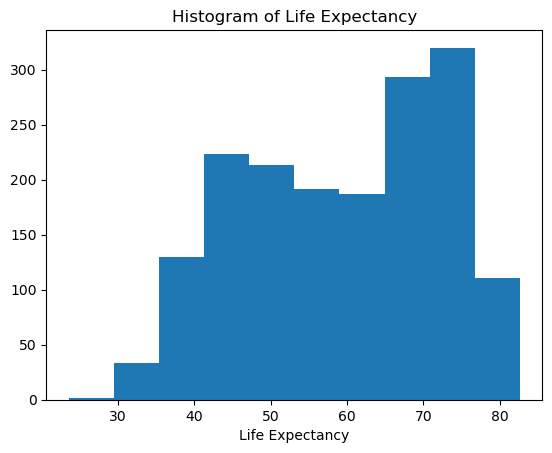

In [174]:
### GRADED

### BEGIN SOLUTION
plt.title('Histogram of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.hist(gap_df['lifeExp'])
plt.show()

[Back to top](#Index:) 

### Problem 5: Histogram of GDP

**2 Points**

Use matplotlib to create a histogram of the GDP data.  Add the title "Histogram of GDP per capita" and an x-label "GDP Per Capita".  Save your histogram as `gdp_hist.png` to the images folder.


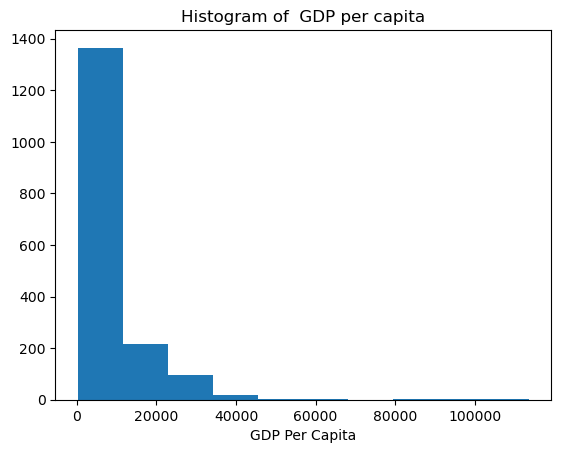

In [175]:
### GRADED

### BEGIN SOLUTION
plt.title('Histogram of  GDP per capita')
plt.xlabel('GDP Per Capita')
plt.hist(gap_df['gdpPercap'])
plt.show()

[Back to top](#Index:) 

### Problem 6: `pandas` histogram

**2 Points**


An alternative way to draw a histogram of a column in a DataFrame is to use the `.hist()` method.  This wraps the matplotlib histogram function and adds a few additional presets like a grid.  Below, select the GDP column and use the `.hist()` method to create a histogram using the built in pandas method. Save your image as `gdp_hist_pandas.png` to the `images` folder.


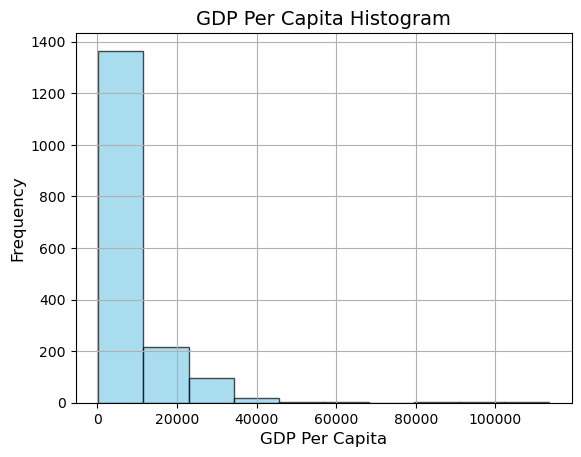

In [179]:
### GRADED

### BEGIN SOLUTION
#gap_df['gdpPercap'].hist(grid=True).figure.savefig('images/gdp_hist_pandas.png')

### END SOLUTION

#img6 = './images/gdp_hist_pandas.png'

# Generate a histogram directly using Pandas
gap_df['gdpPercap'].hist(grid=True, color='skyblue', edgecolor='black', alpha=0.7)

# Add title and labels
plt.title('GDP Per Capita Histogram', fontsize=14)
plt.xlabel('GDP Per Capita', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


[Back to top](#Index:) 

### Problem 7: `pandas` scatterplot

**2 Points**

Similar to the `.hist()` method, pandas has a general `.plot()` method where you can specify the kind of plot.  Use this to create a scatterplot of GDP on the x-axis and Life Expectancy on the y-axis.  You will have to call `.plot()` on the entire DataFrame and specify the `x` and `y` arguments to the `.plot()` function with the `kind = scatter` argument.  Save your plot as `gdp_lifexp_scatter_pandas.png` to the `images` folder.


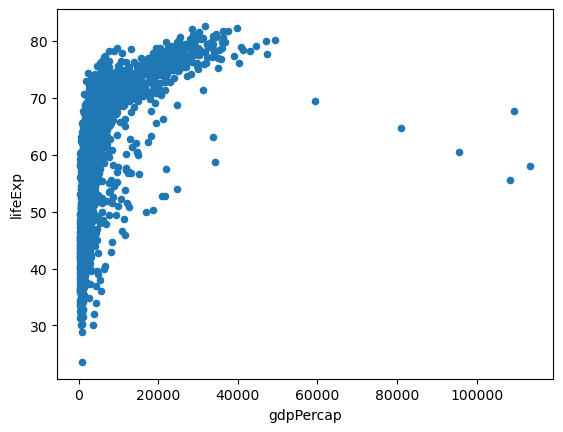

In [180]:
### GRADED

### BEGIN SOLUTION
gap_df.plot(x='gdpPercap', y='lifeExp', kind = 'scatter')
#plt.savefig('images/gdp_lifexp_scatter_pandas.png')
plt.show()


## Codio Activity 2.6: Computing the Sample Covariance Matrix

**Expected Time: 45 Minutes**

**Total Points: 20**

This activity focuses on using covariance and correlation to understand the strength of relationships between two quantitative variables.  Also, you will use a heatmap to visualize these relationships.  Finally, you identify situations where correlation is not an appropriate measure based on the assumption of a linear variable.

## Index:

- [Problem 1](#Problem-1:-Calculating-Covariance)
- [Problem 2](#Problem-2:-Calculating-Correlation)
- [Problem 3](#Problem-3:-Heatmap-of-Covariance)
- [Problem 4](#Problem-4:-Heatmap-of-Correlation)


### Covariance and Correlation

In probability theory and statistics, the mathematical concepts of covariance and correlation are very similar. Both describe the degree to which two random variables or sets of random variables tend to deviate from their expected values in similar ways.

If X and Y are two random variables, with means (expected values)  $\mu_X$ and  $\mu_Y$ and standard deviations  $σ_X$ and  $σ_Y$, respectively, then their covariance and correlation are as follows:

Covariance $$\text{cov}_{XY}=\sigma_{XY}=E[(X-\mu_{X})\,(Y-\mu_{Y})]$$

Correlation $$\text{corr}_{XY} = \rho_{XY} = E[(X - \mu_X)(Y - \mu_Y)]/(\sigma_X \sigma_Y)$$

so that

$$\rho_{XY}=\sigma_{XY}/(\sigma_{X} \sigma_{Y})$$


where E is the expected value operator. Notably, correlation is dimensionless while covariance is in units obtained by multiplying the units of the two variables. --[source](https://en.wikipedia.org/wiki/Covariance_and_correlation)

#### Dataset: Penguins

Our sample dataset comes from the `seaborn` visualization library and contains measurements of penguins of different species located on different islands.  Below, we load the data and display the first few rows and datatype information.

In [181]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [182]:
penguin_df = pd.read_csv('penguins.csv')

In [183]:
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


In [184]:
penguin_df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen            36.7           19.3              193.0   
4  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3       3450.0  Female  
4       3650.0    Male

[Back to top](#Index:) 

### Problem 1: Calculating Covariance

**4 Points**

Pandas DataFrame's have a built in `.cov()` method that will return the covariance between each numeric feature.

Use the `.cov()` method on `penguin_df` to create the covariance matrix.  Assign your solution to the variable `penguins_cov` below.

In [187]:
### GRADED

penguins_cov = ''

### BEGIN SOLUTION
penguins_cov = penguin_df.cov()
### END SOLUTION

print(penguins_cov)
## it shows and error since cov computes only numerical variables not categoricals

ValueError: could not convert string to float: 'Adelie'

In [188]:
# Select only numeric columns
numeric_penguins_df = penguin_df.select_dtypes(include=['number'])

# Calculate covariance matrix
penguins_cov = numeric_penguins_df.cov()

# Print the covariance matrix
print(penguins_cov)


                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm          29.906333      -2.462091          50.058195   
bill_depth_mm           -2.462091       3.877888         -15.947248   
flipper_length_mm       50.058195     -15.947248         196.441677   
body_mass_g           2595.623304    -748.456122        9852.191649   

                     body_mass_g  
bill_length_mm       2595.623304  
bill_depth_mm        -748.456122  
flipper_length_mm    9852.191649  
body_mass_g        648372.487699  


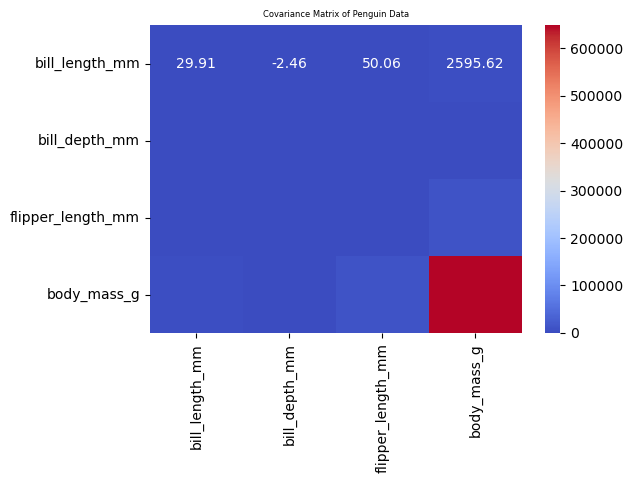

In [192]:
plt.figure(figsize=(6, 4))
sns.heatmap(penguins_cov, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Covariance Matrix of Penguin Data", fontsize=6)
plt.show()

[Back to top](#Index:) 

### Problem 2: Calculating Correlation

**4 Points**

Similarly, pandas DataFrames have a built in `.corr()` method that computes the correlation matrix for numerical columns.  

Use the `.corr()` method on `penguins_df` and assign your results to the variable `penguin_corr`.

In [194]:
# Select only numeric columns
numeric_penguins_df = penguin_df.select_dtypes(include=['number'])

# Calculate covariance matrix
penguins_corr = numeric_penguins_df.corr()

# Print the covariance matrix
print(penguins_cov)

                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm          29.906333      -2.462091          50.058195   
bill_depth_mm           -2.462091       3.877888         -15.947248   
flipper_length_mm       50.058195     -15.947248         196.441677   
body_mass_g           2595.623304    -748.456122        9852.191649   

                     body_mass_g  
bill_length_mm       2595.623304  
bill_depth_mm        -748.456122  
flipper_length_mm    9852.191649  
body_mass_g        648372.487699  


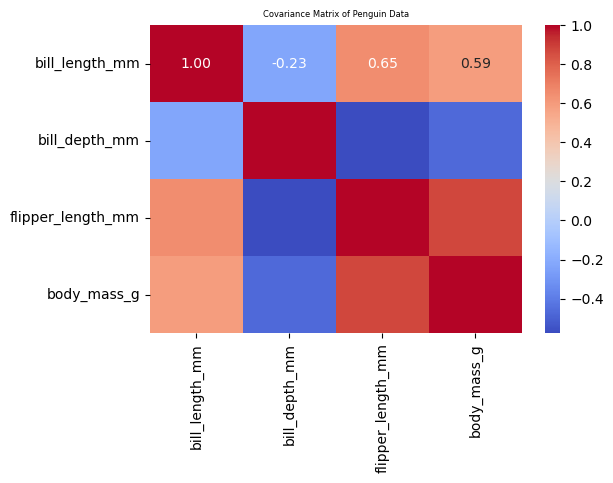

In [195]:
plt.figure(figsize=(6, 4))
sns.heatmap(penguins_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Covariance Matrix of Penguin Data", fontsize=6)
plt.show()

[Back to top](#Index:) 

### Heatmap of Covariance

The code cell below displays a heatmap of the correlation matrix for the `penguin_df` dataframe. Run the code cell below.


<Axes: >

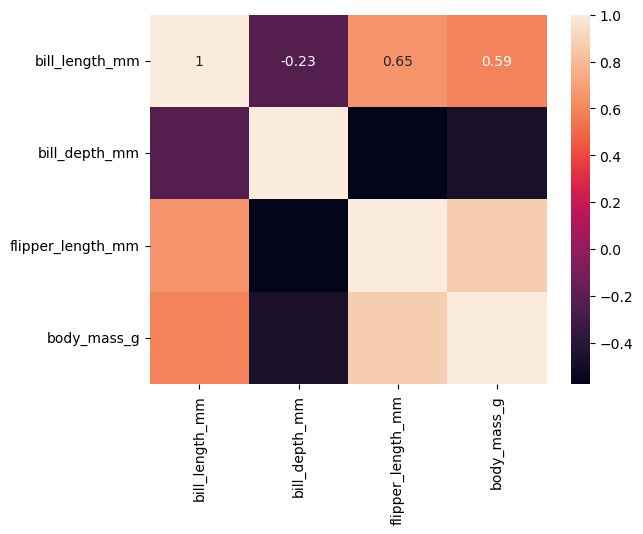

In [197]:
sns.heatmap(numeric_penguins_df.corr(), annot = True)

[Back to top](#Index:) 

### Problem 3: Strongest Positive Correlation

**8 Points**

Which two features have the strongest positive correlation?  Enter your answer as a list of strings using the exact column names to `highest_pos_corr` below.

In [13]:
### GRADED

highest_pos_corr = ''

### BEGIN SOLUTION
highest_pos_corr = ['body_mass_g', 'flipper_length_mm']
### END SOLUTION

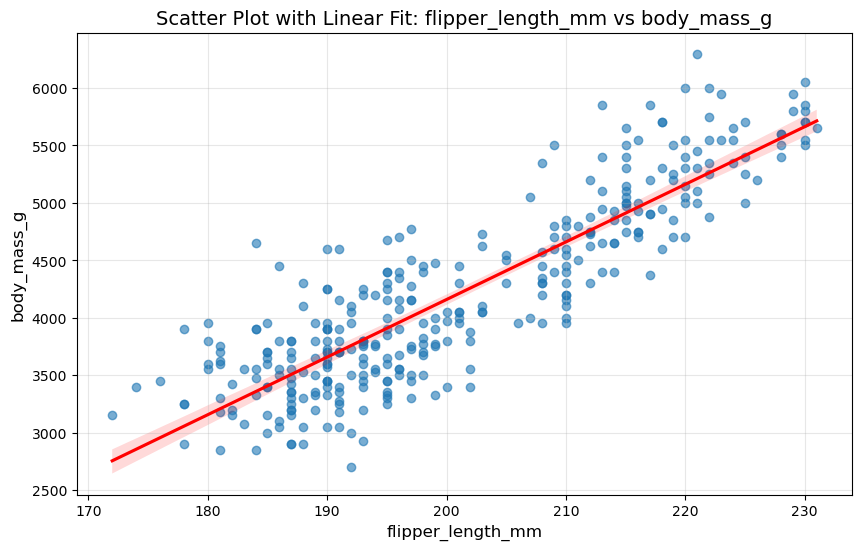

In [205]:
# Calculate the correlation matrix
correlation_matrix = numeric_penguins_df.corr()

# Find the most correlated pairs
most_correlated = correlation_matrix.unstack().sort_values(ascending=False)

# Exclude self-correlations (correlation of a variable with itself)
most_correlated = most_correlated[most_correlated < 1].drop_duplicates()

# Get the top correlated pair
top_correlation = most_correlated.idxmax()
metric_x, metric_y = top_correlation

# Scatter plot with linear regression
plt.figure(figsize=(10, 6))
sns.regplot(x=metric_x, y=metric_y, data=numeric_penguins_df, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.6})
plt.title(f'Scatter Plot with Linear Fit: {metric_x} vs {metric_y}', fontsize=14)
plt.xlabel(metric_x, fontsize=12)
plt.ylabel(metric_y, fontsize=12)
plt.grid(alpha=0.3)
plt.show()

[Back to top](#Index:) 

### Problem 4: Interpreting negative correlation

**4 Points**

The correlation between `body_mass_g` and `bill_depth_mm` reads -0.47.  Complete the following sentence that interprets this correlation.

```
As body mass increases bill depth ___________
```

Assign your solution as a string -- either `increases`, `decreases`, or `neither` to `ans_4` below.

In [ ]:
### GRADED

ans_4 = ''

### BEGIN SOLUTION
ans_4 = 'decreases'
### END SOLUTION

### Codio Activity 2.7: Approximating Correlation from Scatterplots

**Expected Time: 30 Minutes**

**Total Points: 25**

This assignment aims to reinforce your understanding of correlation.  

A scatterplot of two random variables is shown in an image, and you are asked to guess whether the variables are positively correlated, negatively correlated, or not correlated at all. 

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)


In [198]:
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

[Back to top](#Index:) 

### Problem 1

**5 Points**

Given the scatterplot below, determine whether the variables `x1` and `y` are positively, negatively, or not correlated. 

Assign your solution as a string -- either `positive`, `negative`, or `not` to `ans_1` below.



![](images/guess_1.png)

In [23]:
### GRADED

ans1 = None

### BEGIN SOLUTION
ans1 = 'positive'
### END SOLUTION

[Back to top](#Index:) 

### Problem 2

**5 Points**


Given the scatterplot below, determine whether the variables `x2` and `y` are positively, negatively, or not correlated. 

Assign your solution as a string -- either `positive`, `negative`, or `not` to `ans_2` below.


![](images/guess_2.png)

In [25]:
### GRADED

ans2 = None

### BEGIN SOLUTION
ans2 = 'not'
### END SOLUTION

[Back to top](#Index:) 

### Problem 3

**5 Points**

Given the scatterplot below, determine whether the variables `x3` and `y` are positively, negatively, or not correlated. 

Assign your solution as a string -- either `positive`, `negative`, or `not` to `ans_3` below.

![](images/guess_3.png)

In [27]:
### GRADED

ans3 = None

### BEGIN SOLUTION
ans3 = 'positive'
### END SOLUTION

[Back to top](#Index:) 

### Problem 4

**5 Points**


Given the scatterplot below, determine whether the variables `x4` and `y` are positively, negatively, or not correlated. 

Assign your solution as a string -- either `positive`, `negative`, or `not` to `ans_4` below.

![](images/guess_4.png)

In [29]:
### GRADED

ans4 = None

### BEGIN SOLUTION
ans4 = 'negative'
### END SOLUTION


[Back to top](#Index:) 

### Problem 5

**5 Points**


Given the scatterplot below, determine whether the variables `x5` and `y` are positively, negatively, or not correlated. 

Assign your solution as a string -- either `positive`, `negative`, or `not` to `ans_5` below.

![](images/guess_5.png)

In [31]:
### GRADED

ans5 = None

### BEGIN SOLUTION
ans5 = 'not'
### END SOLUTION


### Codio Activity 2.8: Histograms and Conditional Probability Distributions

**Expected Time: 45 Minutes**

**Total Points: 20**

This assignment uses `pandas` and `seaborn` to plot distributions of data conditioned on categorical features.  

#### Index:

- [Question 1](#Problem-1:-Conditional-Probabilities-with-`pandas`)
- [Question 2](#Problem-2:-$P(age->-40-|-class-=-~--'Second')$)
- [Question 3](#Problem-3:-Visualizing-the-Conditional-Probability)
- [Question 4](#Problem-4:-$P(\text{over 30}-|-\text{survived})$)
- [Question 5](#Problem-5:-Which-is-more-likely?)


In [199]:
import pandas as pd
import seaborn as sns
import numpy as np

### The Dataset

For this assignment the dataset from `seaborn` relating to the titanic will be used.  This dataset contains specific information for each passenger on the titanic cruise ship.  Below the data is loaded, the first five rows displayed, and information on features displayed.  



In [200]:
titanic = sns.load_dataset('titanic')

In [201]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [202]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


[Back to top](#Index:) 

### Problem 1: Conditional Probabilities with `pandas`

**3 Points**

Using the `titanic` data, conditional probabilities can be calculated by subsetting the data to the condition of interest and comparing the outcomes within this criteria.  For example, what is the probability given that someone is in first class that they are over the age of 40? 

To compute this, assign the following objects to the specified variable:

```python
first_class = #how many people in first class
first_class_over_40 = #how many people in first class were over the age of 40?
p_over_40_given_first_class = #p(age > 40 | class = First)
```

In [206]:
### GRADED

first_class = ''
first_class_over_40 = ''
p_over_40_given_first_class = ''

### BEGIN SOLUTION
first_class = titanic.loc[titanic['class'] == 'First'].shape[0]
first_class_over_40 = titanic.loc[(titanic['age'] > 40) & (titanic['class'] == 'First')].shape[0]
p_over_40_given_first_class = first_class_over_40/first_class
### END SOLUTION

# Answer check
print(p_over_40_given_first_class)

0.35185185185185186


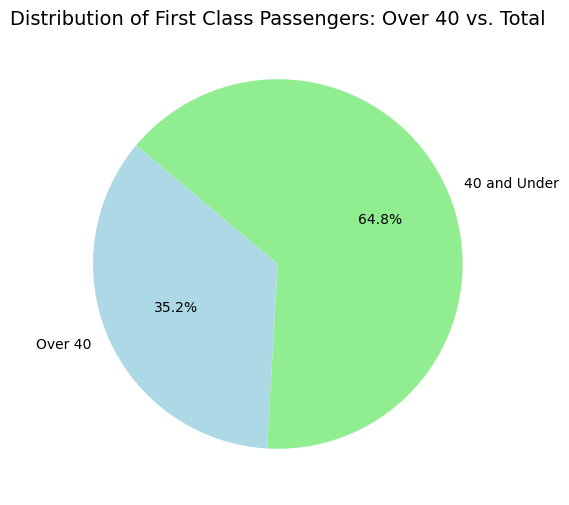

In [215]:
# Calculate the total number of First Class passengers
total_first_class = titanic.loc[titanic['class'] == 'First'].shape[0]

# Calculate the number of First Class passengers over 40
over_40_first_class = titanic.loc[(titanic['age'] > 40) & (titanic['class'] == 'First')].shape[0] #It's a direct and efficient way to count rows without iterating through the data.

# Prepare data for the pie chart
data = [over_40_first_class, total_first_class - over_40_first_class]
labels = ['Over 40', '40 and Under']
colors = ['lightblue', 'lightgreen']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribution of First Class Passengers: Over 40 vs. Total', fontsize=14)
plt.show()

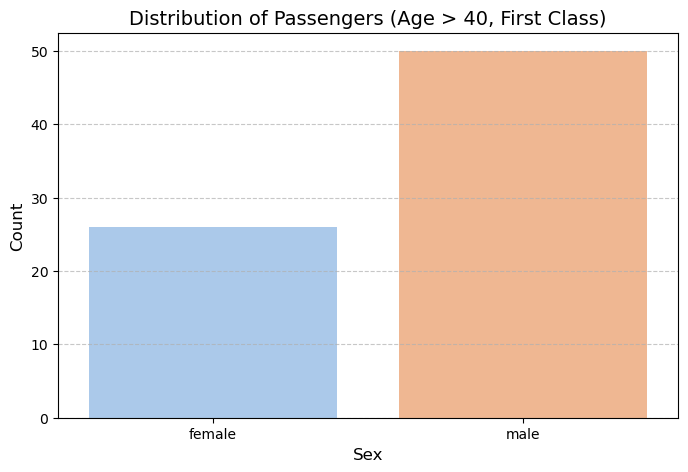

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data
filtered_data = titanic.loc[(titanic['age'] > 40) & (titanic['class'] == 'First')][['sex', 'age', 'class']]

# Group the data by 'sex' and count the number of passengers
grouped_data = filtered_data.groupby('sex').size().reset_index(name='count')

# Visualization: Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x='sex', y='count', data=grouped_data, palette='pastel')
plt.title('Distribution of Passengers (Age > 40, First Class)', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [217]:
grouped_data

sex  count
0  female     26
1    male     50

<Axes: ylabel='count'>

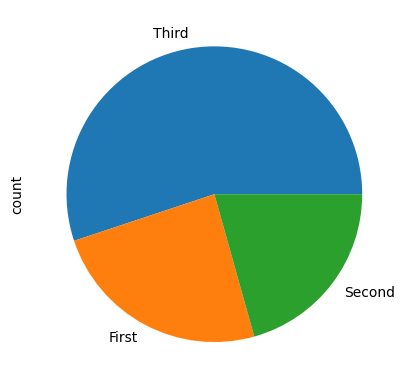

In [220]:
titanic['class'].value_counts().plot(kind='pie')

In [224]:
titanic.groupby('class').agg({'age': 'mean', 'fare': 'mean'})

/var/folders/0y/y7x747912cx8gf89wbjpbfnh0000gn/T/ipykernel_95780/1367824705.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('class').agg({'age': 'mean', 'fare': 'mean'})


age       fare
class                       
First   38.233441  84.154687
Second  29.877630  20.662183
Third   25.140620  13.675550

/var/folders/0y/y7x747912cx8gf89wbjpbfnh0000gn/T/ipykernel_95780/55608815.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for class_group, data in titanic.groupby('class')['age']:


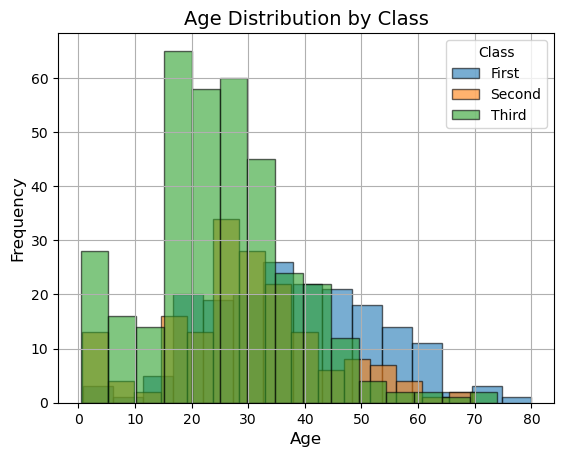

In [231]:
# Group by 'class' and plot histograms for 'age'
for class_group, data in titanic.groupby('class')['age']:
    data.hist(alpha=0.6, label=class_group, bins=15, edgecolor='black')

# Add labels and legend
plt.title('Age Distribution by Class', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Class')
plt.show()

[Back to top](#Index:) 

### Problem 2: $P(age > 40 | class = ~  'Second')$

**3 Points**

Now compute the probability that a passenger is over the age of 40 given that the passenger was in second class.  

To compute this, assign the following objects to the specified variable:

```python
second_class = #how many people in second class
second_class_over_40 = #how many people in second class were over the age of 40?
p_over_40_given_second_class = #p(age > 40 | class = Second)
```



In [232]:
### GRADED

second_class = ''
second_class_over_40 = ''
p_over_40_given_second_class = ''

### BEGIN SOLUTION
second_class = titanic.loc[titanic['class'] == 'Second'].shape[0]
second_class_over_40 = titanic.loc[(titanic['age'] > 40) & (titanic['class'] == 'Second')].shape[0]
p_over_40_given_second_class = second_class_over_40/second_class
### END SOLUTION

# Answer check
print(p_over_40_given_second_class)

0.18478260869565216


[Back to top](#Index:) 

### Problem 3: Visualizing the Conditional Probability

**4 Points**


To visualize the earlier conditional probabilities, draw a plot containing a histogram of the age distribution of passengers in first and second class. Follow the hints below for one approach and use `sns.histplot()` function for drawing the histograms.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

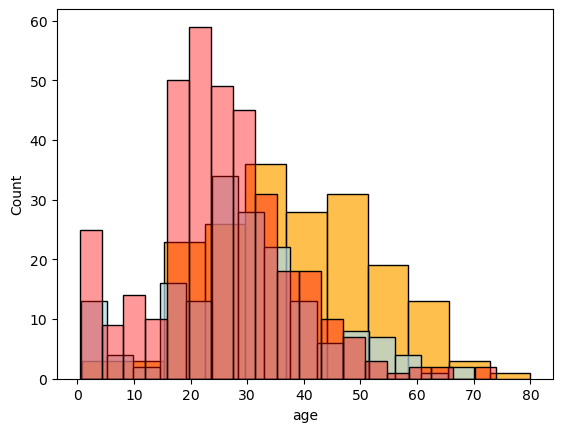

In [239]:
### GRADED

first_class = ''
second_class = ''

#histogram of first class

#histogram of second class

### BEGIN SOLUTION
first_class = titanic.loc[titanic['class'] == 'First']['age']
second_class = titanic.loc[titanic['class'] == 'Second']['age']
third_class = titanic.loc[titanic['class'] == 'Third']['age']
sns.histplot(first_class, color = 'orange', alpha = 0.7)
sns.histplot(second_class, color = 'lightblue', alpha = 0.7)
sns.histplot(third_class, color = 'red', alpha = 0.4)
### END SOLUTION

[Back to top](#Index:) 

### Problem 4: $P(\text{over 30} | \text{survived})$

**4 Points**


Compute the probability given that a passenger survived, given that they were over the age of 30. 


To compute this, assign the following objects to the specified variable:

```python
num_survived = #how many people survived
survived_over_30 = #how many of the survived people were over 30?
p_over_30_given_survived = #p(age > 30 | survived)
```


In [240]:
### GRADED

num_survived = ''
survived_over_30 = ''
p_over_30_given_survived = ''

### BEGIN SOLUTION
num_survived = titanic.loc[titanic['survived'] == 1].shape[0]
survived_over_30 = titanic.loc[(titanic['age'] > 30) & (titanic['survived'] == 1)].shape[0]
p_over_30_given_survived = survived_over_30/num_survived
### END SOLUTION

# Answer check
print(p_over_30_given_survived)

0.36257309941520466


[Back to top](#Index:) 

### Distribution of Ages for Survived and Not Survived



To plot below shows the distribution of ages for those that survived and those that did not together on the same axes.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

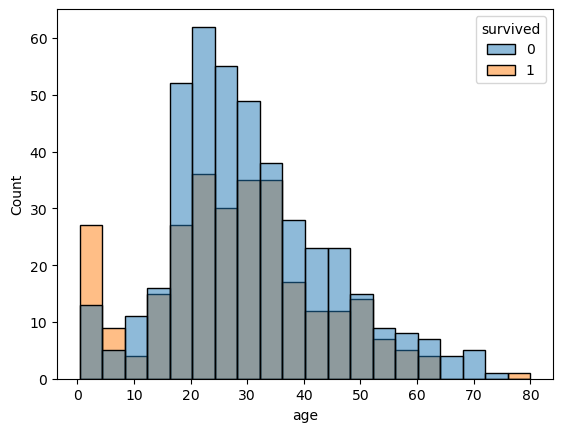

In [245]:

sns.histplot(data = titanic, x = 'age', hue = 'survived')
#0: The passenger did not survive (they perished).
#1: The passenger survived.

[Back to top](#Index:) 

### Problem 5: Which is more likely?

**3 Points**

Based on your histogram above, given that a person was under the age of 20, is it more likely that they survived or that they did not survive?  

Assign your answer as a boolean value to the variable `survived` below. True means you believe more likely to have survived, False more likely to be deceased.

In [14]:
### GRADED

survived = ''

### BEGIN SOLUTION
survived = False


#HERE IS A WAY TO GET TO THE ANSWER USING CODE
#num_under_20 = titanic[titanic['age']<20].shape[0]
#under_20_survived = titanic[(titanic['survived']==1) & (titanic['age']<20)].shape[0]
#p_survived_given_under_20 = under_20_survived/num_under_20

#survived = p_survived_given_under_20>1-p_survived_given_under_20"

### END SOLUTION

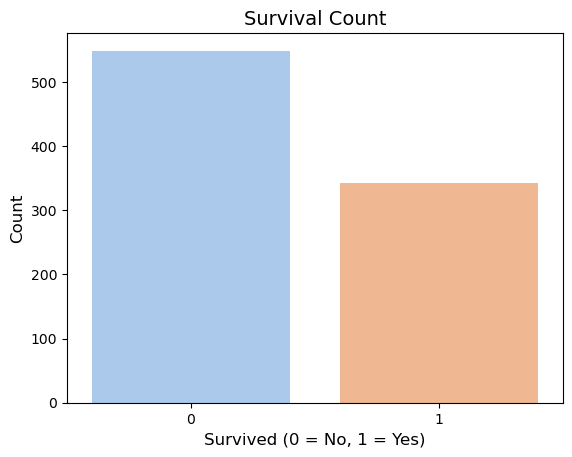

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot survival counts
sns.countplot(data=titanic, x='survived', palette='pastel')
plt.title('Survival Count', fontsize=14)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


In [247]:
# Filter the Titanic data for passengers under 20
under_20 = titanic[titanic['age'] < 20]

# Calculate survival counts
survived_count = under_20['survived'].sum()  # Total survivors (1 = survived)
not_survived_count = len(under_20) - survived_count  # Total non-survivors (0 = not survived)

# Determine the more likely outcome
survived = survived_count > not_survived_count
print(f"More likely to survive? {survived}")


More likely to survive? False


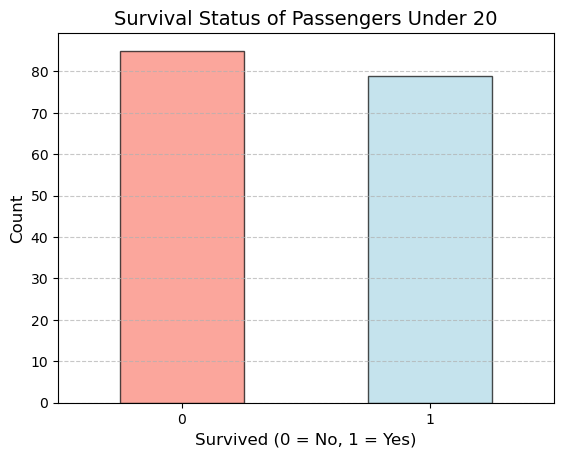

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for passengers under 20
under_20 = titanic[titanic['age'] < 20]

# Create a grouped count of survived vs not survived
survival_counts = under_20.groupby('survived').size()

# Plot the stacked bar chart
survival_counts.plot(kind='bar', color=['salmon', 'lightblue'], alpha=0.7, edgecolor='black')
plt.title('Survival Status of Passengers Under 20', fontsize=14)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

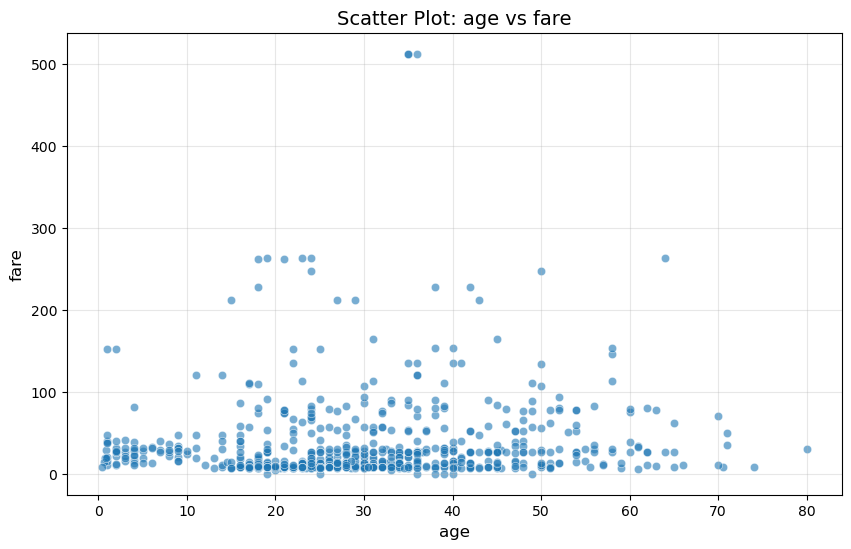

In [251]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Define two numeric columns to plot
metric_x = 'age'  # Example numeric column
metric_y = 'fare'  # Another numeric column

# Scatter plot without the correlation line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=metric_x, y=metric_y, data=titanic, alpha=0.6)
plt.title(f'Scatter Plot: {metric_x} vs {metric_y}', fontsize=14)
plt.xlabel(metric_x, fontsize=12)
plt.ylabel(metric_y, fontsize=12)
plt.grid(alpha=0.3)
plt.show()


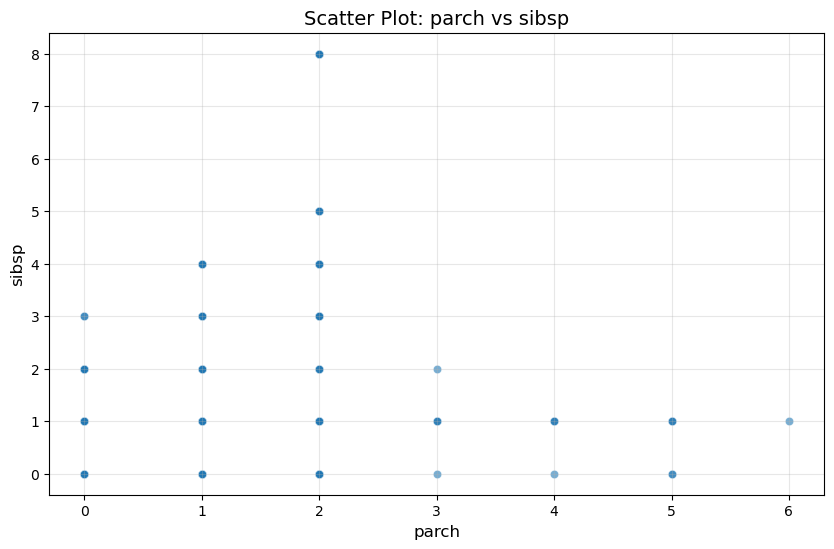

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Define two numeric columns to plot
metric_x = 'parch'  # Example numeric column
metric_y = 'sibsp'  # Another numeric column

# Scatter plot without the correlation line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=metric_x, y=metric_y, data=titanic, alpha=0.6)
plt.title(f'Scatter Plot: {metric_x} vs {metric_y}', fontsize=14)
plt.xlabel(metric_x, fontsize=12)
plt.ylabel(metric_y, fontsize=12)
plt.grid(alpha=0.3)
plt.show()

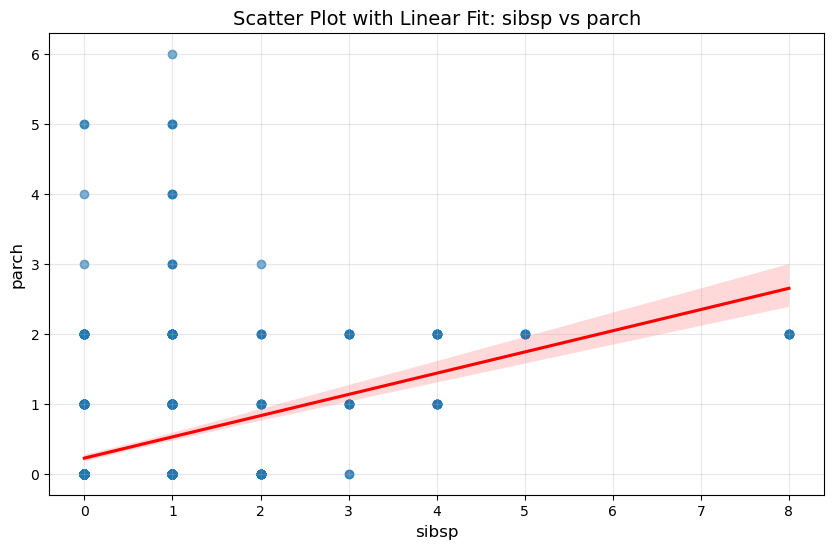

In [253]:
# Select relevant numeric columns for correlation analysis
numeric_titanic_df = titanic.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_titanic_df.corr()

# Find the most correlated pair
most_correlated = correlation_matrix.unstack().sort_values(ascending=False)
most_correlated = most_correlated[most_correlated < 1].drop_duplicates()
top_correlation = most_correlated.idxmax()
metric_x, metric_y = top_correlation

# Scatter plot with linear regression
plt.figure(figsize=(10, 6))
sns.regplot(x=metric_x, y=metric_y, data=titanic, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.6})
plt.title(f'Scatter Plot with Linear Fit: {metric_x} vs {metric_y}', fontsize=14)
plt.xlabel(metric_x, fontsize=12)
plt.ylabel(metric_y, fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [255]:
# Crear un DataFrame con valores no normalizados
data = {'Edad': [18, 25, 30, 35, 50]}
df = pd.DataFrame(data)

print("Datos originales:")
print(df)

Datos originales:
   Edad
0    18
1    25
2    30
3    35
4    50


In [256]:
# Normalizar la columna "Edad" entre 0 y 1
df['Edad_normalizada'] = (df['Edad'] - df['Edad'].min()) / (df['Edad'].max() - df['Edad'].min())

print("\nDatos normalizados:")
print(df)


Datos normalizados:
   Edad  Edad_normalizada
0    18           0.00000
1    25           0.21875
2    30           0.37500
3    35           0.53125
4    50           1.00000


Explicación de la Fórmula
La fórmula para normalizar un valor 
𝑥
x es:

𝑥
normalizado
=
𝑥
−
min
(
𝑥
)
max
(
𝑥
)
−
min
(
𝑥
)
x 
normalizado
​
 = 
max(x)−min(x)
x−min(x)
​
 
min
(
𝑥
)
min(x): El valor mínimo de la columna.
max
(
𝑥
)
max(x): El valor máximo de la columna.
El resultado está en el rango 
[
0
,
1
]
[0,1].


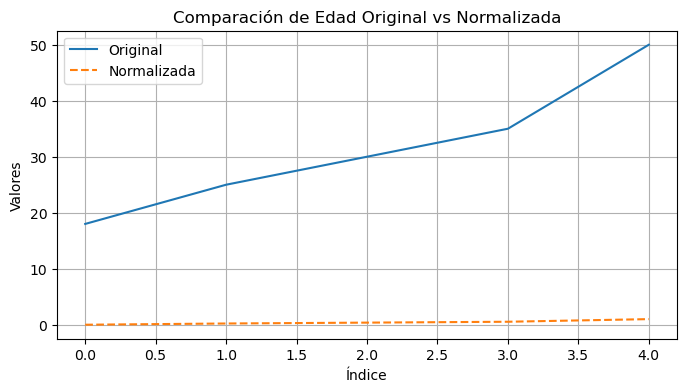

In [257]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(df['Edad'], label='Original')
plt.plot(df['Edad_normalizada'], label='Normalizada', linestyle='--')
plt.title('Comparación de Edad Original vs Normalizada')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend()
plt.grid()
plt.show()

In [258]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Create a sample dataset
data = {'Height_cm': [150, 160, 165, 170, 175],
        'Weight_kg': [50, 60, 65, 70, 80]}

df = pd.DataFrame(data)

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the data
df_standardized = scaler.fit_transform(df)

# Convert back to DataFrame for better readability
df_standardized = pd.DataFrame(df_standardized, columns=df.columns)

print("Original Data:")
print(df)
print("\nStandardized Data:")
print(df_standardized)


Original Data:
   Height_cm  Weight_kg
0        150         50
1        160         60
2        165         65
3        170         70
4        175         80

Standardized Data:
   Height_cm  Weight_kg
0  -1.627467       -1.5
1  -0.464991       -0.5
2   0.116248        0.0
3   0.697486        0.5
4   1.278724        1.5


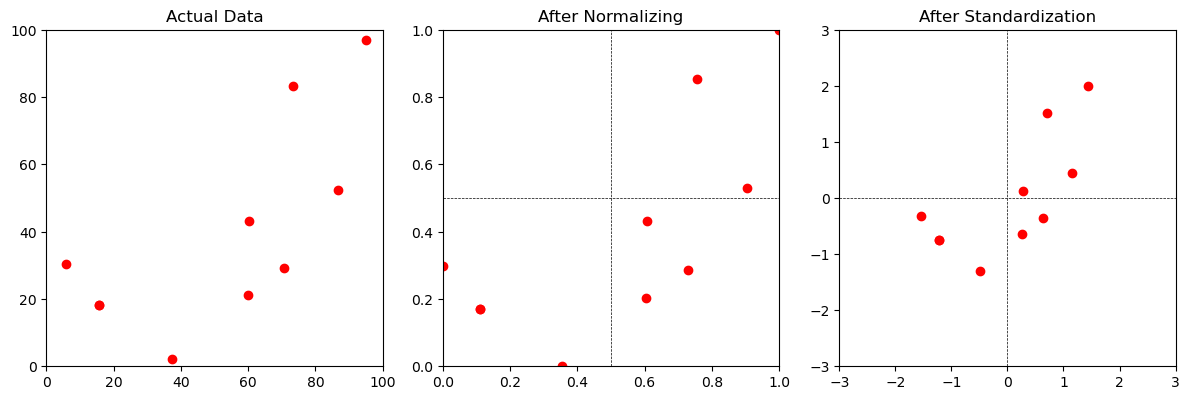

In [265]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
np.random.seed(42)
x = np.random.rand(10) * 100  # Random data scaled between 0 and 100
y = np.random.rand(10) * 100

# Normalize the data
x_normalized = (x - np.min(x)) / (np.max(x) - np.min(x))
y_normalized = (y - np.min(y)) / (np.max(y) - np.min(y))

# Standardize the data
x_standardized = (x - np.mean(x)) / np.std(x)
y_standardized = (y - np.mean(y)) / np.std(y)

# Create the subplots
plt.figure(figsize=(12, 4))

# Plot 1: Actual Data
plt.subplot(1, 3, 1)
plt.scatter(x, y, color='red')
plt.title('Actual Data', fontsize=12)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.gca().set_aspect('equal', adjustable='box')

# Plot 2: Normalized Data (Fixing Axes and Proportions)
plt.subplot(1, 3, 2)
plt.scatter(x_normalized, y_normalized, color='red')
plt.title('After Normalizing', fontsize=12)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axhline(0.5, color='black', linewidth=0.5, linestyle='--')  # Center horizontal line at 0.5
plt.axvline(0.5, color='black', linewidth=0.5, linestyle='--')  # Center vertical line at 0.5
plt.gca().set_aspect('equal', adjustable='box')  # Equal aspect ratio for square grid

# Plot 3: Standardized Data
plt.subplot(1, 3, 3)
plt.scatter(x_standardized, y_standardized, color='red')
plt.title('After Standardization', fontsize=12)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.gca().set_aspect('equal', adjustable='box')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
